# Dépenses de consommation trimestrielles des ménages

## Data Management

### Importations des packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
#from mlxtend.plotting import plot_pca_correlation_graph
import os
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import seaborn as sns

cwd = os.getcwd()

### Importation des données

In [2]:
conso_tri = pd.read_csv('Ressources/Consommation des ménages trimestrielle.csv',sep=';')
conso_tri = conso_tri.set_index('Période').replace({',':'.'},regex=True).astype('float64')

### Year to year variations

In [3]:
yty_var = pd.DataFrame()

for column in conso_tri.columns:
    var = (conso_tri[column].diff(4)/conso_tri[column].shift(4)).iloc[4:].reset_index().drop('Période', axis = 1)
    yty_var[column] = var[var.columns[0]]

yty_var=yty_var.set_index(conso_tri.index.drop('1990T1').drop('1990T2').drop('1990T3').drop('1990T4')).T

In [4]:
yty_var.head()

Période                       1991T1    1991T2    1991T3    1991T4    1992T1  \
Produits agricoles          0.085106  0.062500  0.061224  0.040816 -0.039216   
Energie, eau, déchets       0.166667  0.137255  0.115385  0.109091  0.089286   
Produits agro-alimentaires  0.031674  0.017937  0.035714  0.040000  0.026316   
Cokéfaction et raffinage    0.046154  0.048387  0.015385  0.000000 -0.014706   
 Biens d'équipement         0.069767  0.045455  0.022222  0.000000  0.000000   

Période                       1992T2    1992T3    1992T4    1993T1    1993T2  \
Produits agricoles         -0.058824 -0.096154 -0.078431 -0.040816 -0.020833   
Energie, eau, déchets       0.034483  0.051724  0.016393  0.016393  0.016667   
Produits agro-alimentaires  0.044053  0.030172  0.025641  0.029915  0.033755   
Cokéfaction et raffinage    0.000000 -0.015152 -0.044118 -0.014925  0.015385   
 Biens d'équipement        -0.021739 -0.021739 -0.021739 -0.021739  0.000000   

Période                     ...    2017T3    2017T4    2018T1    2018T2  \
Produits agricoles          ...  0.000000  0.000000  0.011111  0.000000   
Energie, eau, déchets       ...  0.022388 -0.014184  0.065693 -0.007353   
Produits agro-alimentaires  ...  0.011312  0.018100  0.017978  0.006711   
Cokéfaction et raffinage    ...  0.089109  0.056604  0.070796  0.145455   
 Biens d'équipement         ...  0.038462  0.038462  0.012658  0.000000   

Période                       2018T3    2018T4    2019T1    2019T2    2019T3  \
Produits agricoles          0.022472  0.011111  0.000000  0.022222  0.010989   
Energie, eau, déchets       0.029197  0.028777 -0.027397  0.081481  0.028369   
Produits agro-alimentaires  0.017897  0.013333  0.006623  0.020000  0.013187   
Cokéfaction et raffinage    0.145455  0.133929  0.024793  0.015873  0.000000   
 Biens d'équipement        -0.012346 -0.012346  0.012500  0.012500  0.000000   

Période                       2019T4  
Produits agricoles          0.010989  
Energie, eau, déchets      -0.006993  
Produits agro-alimentaires  0.017544  
Cokéfaction et raffinage   -0.007874  
 Biens d'équipement         0.025000  

[5 rows x 116 columns]

## ACP

In [5]:
from sklearn.preprocessing import StandardScaler
X_yty_var = StandardScaler().fit_transform(yty_var.T)

pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X_yty_var))
print(np.around(pca.explained_variance_ratio_,3))

[0.293 0.127 0.091 0.076 0.063 0.059 0.05  0.043 0.037 0.033 0.031 0.027
 0.019 0.018 0.014 0.01  0.008 0.001]


Text(0.5, 1.0, 'Variance expliquée')

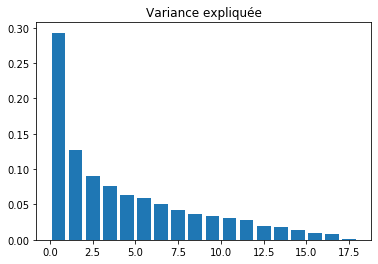

In [6]:
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

In [7]:
#figure, correlation_matrix = plot_pca_correlation_graph(yty_var.T,  yty_var.T.columns, figure_axis_size=5)

In [8]:
principal_components = pd.DataFrame(pca.components_)
principal_components = principal_components.rename({i : 'PC'+str(i+1) for i in range(len(principal_components.columns))},axis=1)
principal_components = principal_components.rename(dict(zip(range(len(yty_var.T.columns)),yty_var.T.columns)))

In [9]:
principal_components

PC1       PC2       PC3       PC4       PC5  \
Produits agricoles          -0.057967 -0.009791 -0.206542 -0.212587 -0.286928   
Energie, eau, déchets       -0.195164  0.304346  0.235915 -0.034448 -0.092090   
Produits agro-alimentaires   0.391273  0.380406  0.328096  0.357920 -0.154959   
Cokéfaction et raffinage     0.500924  0.222146  0.077547 -0.363561  0.269309   
 Biens d'équipement         -0.013741 -0.316934  0.132157 -0.048928  0.281306   
Matériels de transport       0.045414  0.223475  0.314237 -0.028239 -0.079041   
Autres produits industriels  0.072600  0.267004 -0.361955 -0.074552  0.049453   
Construction                 0.337897 -0.238258 -0.137763 -0.270368  0.128704   
Commerce                    -0.136038 -0.348540  0.428788 -0.130752 -0.441026   
Transport                   -0.005990  0.142952 -0.104703  0.355958 -0.006471   
Hébergement-restauration     0.024630 -0.293503 -0.000156  0.562918  0.128691   
Information-communication   -0.607862  0.329147  0.068605 -0.198945  0.201149   
Services financiers          0.124198  0.034766 -0.060818 -0.167422 -0.300106   
Services immobiliers        -0.132120 -0.067487 -0.012608  0.065753  0.503587   
Services aux entreprises     0.058988  0.007125  0.522093 -0.144603  0.314181   
Services non marchands       0.040692  0.093511 -0.178382  0.022606 -0.095613   
Services aux ménages         0.057639 -0.276632  0.105006 -0.085275 -0.051368   
TOTAL                       -0.053388 -0.085402 -0.054859 -0.224021 -0.050392   

                                  PC6       PC7       PC8       PC9      PC10  \
Produits agricoles          -0.132358 -0.326237 -0.182181 -0.220848 -0.215477   
Energie, eau, déchets       -0.302971 -0.020912  0.238975 -0.308551  0.089777   
Produits agro-alimentaires  -0.186826  0.101101 -0.045646 -0.142566 -0.095137   
Cokéfaction et raffinage    -0.087102  0.130966 -0.150869  0.084890 -0.280851   
 Biens d'équipement         -0.035855  0.212162 -0.558114 -0.364470  0.388638   
Matériels de transport       0.426420 -0.347531 -0.214439  0.245862  0.196404   
Autres produits industriels  0.615900 -0.002362 -0.068499 -0.218773 -0.001617   
Construction                -0.017570  0.065889  0.071928 -0.019705 -0.368861   
Commerce                     0.246144  0.155611  0.007246 -0.224908 -0.404267   
Transport                   -0.112010 -0.051996 -0.528221 -0.267229 -0.269286   
Hébergement-restauration     0.089257 -0.192730 -0.040074  0.274321 -0.343314   
Information-communication   -0.002217  0.122525 -0.270517  0.214165 -0.373949   
Services financiers         -0.248810 -0.424427 -0.272861  0.280035  0.105188   
Services immobiliers        -0.157813 -0.432980  0.183259 -0.210378 -0.111520   
Services aux entreprises     0.154767 -0.310068  0.088162 -0.110038 -0.044765   
Services non marchands       0.156939 -0.283449  0.153656 -0.457198 -0.064323   
Services aux ménages         0.019416 -0.232322 -0.151188  0.002035  0.091475   
TOTAL                       -0.261844 -0.135931 -0.037186 -0.004463 -0.015738   

                                 PC11      PC12      PC13      PC14      PC15  \
Produits agricoles          -0.285986 -0.302313 -0.251700 -0.210912 -0.269579   
Energie, eau, déchets       -0.336299  0.092664 -0.006764  0.414259 -0.149756   
Produits agro-alimentaires  -0.065582 -0.163921  0.344782 -0.283750 -0.195066   
Cokéfaction et raffinage     0.030911  0.331526 -0.333210  0.136330 -0.242130   
 Biens d'équipement         -0.042073  0.112924  0.083633 -0.200671 -0.215020   
Matériels de transport      -0.163295  0.230680 -0.150153  0.102193  0.082937   
Autres produits industriels -0.350429 -0.113588  0.176873 -0.049413 -0.067690   
Construction                -0.096516 -0.136321  0.390980  0.133889  0.214387   
Commerce                    -0.100506  0.310221  0.034691 -0.088994  0.096074   
Transport                    0.076212 -0.041975 -0.171554  0.308658  0.516368   
Hébergement-restauration    -0.106979  0.029801 -0.129848 -0.01

Les 3 premières composantes principales représentent plus de 50%. Les catégories qu'on en déduit sont : 
- PC1 : Produits agro-alimentaires ; Cokéfaction et raffinage ; Information communication 
- PC2 : Produits agro-alimentaires ; Energie, eau, déchets ; Biens d'équipement ; Commerce ; Information-communication 
- PC3 : Biens d’équipement ; Commerce ; Autres produits industriels ; Services aux entreprises ; Produits agro-alimentaires



## Analyse de la variance

### Calcul du poids de chaque catégorie

In [10]:
weights = pd.DataFrame()

for date in conso_tri.T.columns:
    weights[date] = conso_tri.T[date]*(1/conso_tri.T[date][17])

weights = weights.set_index(conso_tri.T.index).iloc[:-1,:].T

In [11]:
meanWeights = pd.DataFrame(weights.mean(), columns=['Poids moyen']).T

In [12]:
meanWeights.T

Poids moyen
Produits agricoles              0.029587
Energie, eau, déchets           0.042214
Produits agro-alimentaires      0.153231
Cokéfaction et raffinage        0.042582
 Biens d'équipement             0.030978
Matériels de transport          0.062470
Autres produits industriels     0.144076
Construction                    0.014645
Commerce                        0.012431
Transport                       0.029877
Hébergement-restauration        0.066092
Information-communication       0.044335
Services financiers             0.058375
Services immobiliers            0.177597
Services aux entreprises        0.020021
Services non marchands          0.047863
Services aux ménages            0.037336

### Variance des variations

In [13]:
variance = pd.DataFrame(yty_var.iloc[:-1,:].T.var(), columns=["Variance de variations"]).T


In [14]:
variance.T

Variance de variations
Produits agricoles                         0.001128
Energie, eau, déchets                      0.002409
Produits agro-alimentaires                 0.000166
Cokéfaction et raffinage                   0.008345
 Biens d'équipement                        0.001748
Matériels de transport                     0.004565
Autres produits industriels                0.000302
Construction                               0.000896
Commerce                                   0.001350
Transport                                  0.000647
Hébergement-restauration                   0.000638
Information-communication                  0.001752
Services financiers                        0.008093
Services immobiliers                       0.000303
Services aux entreprises                   0.000718
Services non marchands                     0.000444
Services aux ménages                       0.000761

### Part de la variance

In [15]:
share_of_variance = pd.DataFrame()

totalVariance = 0

for i in range(0,17,1):
    totalVariance += variance.T['Variance de variations'][i]*meanWeights.T['Poids moyen'][i]

for column in variance.columns: 
    share_of_variance[column] = pd.Series([variance[column][0]*meanWeights[column][0]*100/totalVariance])

share_of_variance.index = ['Part de la variance en %']

In [16]:
share_of_variance.T.sort_values(by='Part de la variance en %')[::-1]

Part de la variance en %
Services financiers                         28.492339
Cokéfaction et raffinage                    21.431423
Matériels de transport                      17.200445
Energie, eau, déchets                        6.134297
Information-communication                    4.683159
 Biens d'équipement                          3.264787
Services immobiliers                         3.246148
Autres produits industriels                  2.621125
Hébergement-restauration                     2.544869
Produits agricoles                           2.013147
Services aux ménages                         1.714313
Produits agro-alimentaires                   1.537613
Services non marchands                       1.280434
Transport                                    1.165999
Commerce                                     1.012056
Services aux entreprises                     0.866817
Construction                                 0.791030

In [17]:
share_of_variance.T["Part de la variance en %"].nlargest(6).sum()

81.20644857805407

Nouvelle analyse de la variance  : 

On en déduit donc les 3 catégories principales suivantes: Services financiers ; Cokéfaction et raffinage ; Matériel de transport  ;

# Sélection des variables officielles

## Importation des données

In [18]:
""" Import de la variable cible : conso """

conso = pd.read_csv('Ressources/Consommation des ménages trimestrielle.csv',sep=';')
conso = conso.set_index('Période').replace({',':'.'},regex=True).astype('float64')

""" Import des variables explicatives : goods, services, retail_trade """

goods = pd.read_csv('Ressources/Goods index.csv',sep=';').drop(range(6))
goods = goods.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

services = pd.read_csv('Ressources/Services index.csv',sep=';').drop(range(4))
services = services.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

retail_trade = pd.read_csv('Ressources/Retail trade index.csv',sep=';').drop(range(4)).reset_index().drop('index',axis=1)
retail_trade = retail_trade.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

services_90 = services.loc['Déc 2019':'Jan 1990'].reset_index()
goods_90 = goods.loc[:'01/01/1990'].reset_index()
goods_90['Date'] = retail_trade.reset_index()['Date'] 

""" Constitution d'une dataframe X explicative, et constitution d'une yty-var-indice """

X = retail_trade.merge(services_90,on='Date').merge(goods_90,on='Date').set_index('Date')
X_trimestriel = pd.DataFrame([X.iloc[3*k:3*(k+1)].mean() for k in range(int(len(X)/3))],columns=X.columns,index=conso.index[::-1]).iloc[::-1]


In [19]:
len(X.columns)

1356

Regardons comment les indices se répartissent entre brut et cvs

In [20]:
variablesOfficielles = X_trimestriel.columns

variablesOfficiellesBrut = [variable for variable in variablesOfficielles if "brut" in variable.lower() ]
variablesOfficiellesCvs = [variable for variable in variablesOfficielles if "cvs" in variable.lower() ]
variablesOfficiellesTendance = [variable for variable in variablesOfficielles if "tendance" in variable.lower() ]

In [21]:
total = len(variablesOfficiellesBrut) + len(variablesOfficiellesCvs) + len(variablesOfficiellesTendance)
total == len(variablesOfficielles)

True

## Analyse rapide et première sélection

En utilisant ce que nous avons fait précédemment nous savons que nous devons nous intéresser à des variables permettant de suivres les fonctions de consommation suivante : 
- Produits agro-alimentaires
- Cokéfaction et raffinage
- Biens d'équipement
- Commerce     
- Matériel de transport
- Information communication
- Services financiers 

En effet : 

L'ACP retient les catégories suivantes : Produits agro-alimentaires (*3) ; Information communication (*2) ; Cokéfaction et raffinage ; Energie, eau, déchets ; Biens d'équipement(*2) ; Commerce(*2) ; Autres produits industriels ; Services aux entreprises ; 
L'analyse de la variance celles-ci : Services financiers ; Cokéfaction et raffinage ; Matériel de transport

Mais nous disposons dans notre jeu de donnée de plus de 1300 variables. Nous allons donc devoir commencer par le simplifier. Pour cela nous allons le "découper" en sous-catégories.
Puis nous sélectionneront les sous-catégories intéressantes pour chacune des fonction de consommation ce qui nous donneras une présélection des variables. 

In [22]:
def create_subcategories(datasetVariables) : 

    groups = dict()
    groups["Non catégorisés"] = []

    for i in range(len(datasetVariables)) : 
    
        completeVariable = datasetVariables[i]

        separator = ","

        if not completeVariable.find(",") == -1 :
            separator = ","
        elif not completeVariable.find("-") == -1 :
            separator = "-"
        else :
            separator = ""
    
        if not separator == "" :
            cuts = completeVariable.split(separator)
            category = (separator.join(cuts[:len(cuts)-1]),cuts[0])[len(cuts)<3]
            shortVariable = cuts[len(cuts)-1]
                
            if not category in groups : 
                groups[category] = list()
    
            groups[category].append(shortVariable)

        else : 
            groups["Non catégorisés"].append(completeVariable)

    indexCategories = pd.DataFrame(groups.keys(), columns=["categories"])

    indexCategories["length"] = range(len(indexCategories["categories"]))

    for i in range(len(indexCategories["categories"])):
        indexCategories["length"][i] = len(groups[indexCategories["categories"][i]])
    
    return indexCategories, groups

In [23]:
indexCategories, sortedOutInputs = create_subcategories(variablesOfficielles)

In [24]:
len(indexCategories)

112

Regardons les sous-catégories qui composent notre jeu de données et choisissons celles que nous allons garder.

In [25]:
indexCategories.categories[0:25]

0                                       Non catégorisés
1                                      Vente à distance
2                                    Commerce de détail
3                                   Grande distribution
4                                 Produits alimentaires
5                                  Produits Industriels
6                                        Petit commerce
7              Voitures et véhicules automobiles légers
8                               Equipements automobiles
9                                  Cycles et motocycles
10    Alimentation générale, Petit commerce traditio...
11    Alimentation générale hors boucherie, Supermar...
12    Alimentation générale hors boucherie, Hypermar...
13                                         Supermarchés
14                                         Hypermarchés
15                                      Grands magasins
16                             Matériels audio et vidéo
17                                            Br

In [26]:
indexCategories.categories[25:50]

25             Habillement, Petit commerce traditionnel
26    Habillement, Grande surface spécialisée et suc...
27                        Habillement, Vente à distance
28                   Habillement, Hyper et supermarchés
29                                            Chaussure
30                             Produits pharmaceutiques
31                     Parfumerie et produits de beauté
32                             Horlogerie et bijouterie
33                                              Optique
34              Transports, hébergement et restauration
35                          Hébergement et restauration
36    Activités informatiques et services d'information
37                         Information et communication
38    Activités spécialisées, scientifiques, techniq...
39    Activités de services administratifs et de sou...
40                         Autres activités de services
41    Activités indifférenciées des ménages en tant ...
42    Activités juridiques et comptables,conseil

In [27]:
indexCategories.categories[50:75]

50    Activités spécialisées, scientifiques, techniq...
51                 Industries agricoles et alimentaires
52    Equipements électriques et électroniques, autr...
53                Fabrication de matériels de transport
54            Fabrication d'autres produits industriels
55               Textiles, habillement, cuir, chaussure
56    Travail du bois, industries du papier et impri...
57                                   Industrie chimique
58                             Industrie pharmaceutique
59       Produits en caoutchouc et en plastique, autres
60    Métallurgie et fabrication de produits métalli...
61    Fabrication produits informatiques, électroniq...
62                Fabrication d'équipements électriques
63        Fabrication de machines et équipements n.c.a.
64    Autres industries manufacturières, réparation,...
65                             Industrie manufacturière
66                                 Industrie automobile
67          Fabrication d'autres matériels de tr

In [28]:
indexCategories.categories[75:100]

75    Autres produits minéraux non métalliques hors ...
76                                             Fonderie
77                Forge, traitement des métaux, usinage
78    Coutellerie, outillage, quincaillerie, ouvrage...
79    Fabrication de composants et cartes électroniques
80                     Fabrication d'appareils ménagers
81         Fabrication d'autres équipements électriques
82     Fabrication de machines agricoles et forestières
83    Machines de formage des métaux et machines-outils
84     Fabrication d'autres machines d'usage spécifique
85                Fabrication d'équipements automobiles
86    Locomotives et autre matériel ferroviaire roulant
87    Articles de sport, jeux et jouets et autres ac...
88                                     Autre imprimerie
89    Fabrication d'autres produits chimiques inorga...
90    Fabrication d'autres produits chimiques organi...
91           Fabrication de matières plastiques de base
92    Fabrication de peintures, vernis, encres e

In [29]:
indexCategories.categories[100:112]

100    Fabrication d'éléments en matières plastiques ...
101    Fabrication de pièces techniques à base de mat...
102    Fabrication de produits de consommation couran...
103    Fabrication de moteurs, génératrices et transf...
104          Fabrication d'autres pompes et compresseurs
105        Fabrication d'autres articles de robinetterie
106    Fabrication de matériel de levage et de manute...
107    Fabrication de machines pour l'extraction ou l...
108                Construction de véhicules automobiles
109                Industries agricoles et alimentaires 
110               Fabrication d'équipements électriques 
111                            Industrie manufacturière 
Name: categories, dtype: object

In [30]:
sortedOutInputs["Non catégorisés"]

['Indicateur mensuel du climat des affaires dans les services marchands (cvs)',
 "Indicateur mensuel du climat des affaires dans l'industrie manufacturière (cvs)"]

Voici les sous-catégories que nous allons garder pour suivre les différentes fonctions de consommation dont nous avons besoin.

In [31]:
agroAlimentaire = [4,10,11,12,51,109]
cokefactionRaffinage = [74,91]
bienEquipement = [18,52,62,80,81]
commerce = [1,2,3,6,13,14,15]
informationCommunication = [16,36,37]
materielTransport = [34,45,86]

#serviceAuxEntreprises = [36,37,39,40,42]
#hebergementRestauration = [35]

In [32]:
def shortlisted_variables_information(subCategories,indexCategories,names=False):

    variablesNumber = 0
    listNames = []

    for element in subCategories:
        variablesNumber += indexCategories.length[element]
        ("",listNames.append(indexCategories.categories[element]))[names]

    return (variablesNumber, (variablesNumber,listNames))[names]

Décommentez la ligne (ci-dessous) contenant la fonction de consommation que vous voulez suivre pour connaître le nom des sous-catégories de variables qui ont été préséléctionnées.

In [33]:
#shortlisted_variables_information(agroAlimentaire,indexCategories,True)[1]
#shortlisted_variables_information(cokefactionRaffinage,indexCategories,True)[1]
#shortlisted_variables_information(bienEquipement,indexCategories,True)[1]
#shortlisted_variables_information(commerce,indexCategories,True)[1]
#shortlisted_variables_information(informationCommunication,indexCategories,True)[1]
#shortlisted_variables_information(informationCommunication,materielTransport,True)[1]

#shortlisted_variables_information(hebergementRestauration,indexCategories,True)[1]
#shortlisted_variables_information(serviceAuxEntreprises,indexCategories,True)[1]

In [34]:
nombreVariablesPreselectionnees = shortlisted_variables_information(agroAlimentaire,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(cokefactionRaffinage,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(commerce,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(bienEquipement,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(informationCommunication,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(materielTransport,indexCategories)

#nombreVariablesPreselectionnees += shortlisted_variables_information(hebergementRestauration,indexCategories)
#nombreVariablesPreselectionnees += shortlisted_variables_information(serviceAuxEntreprises,indexCategories)

In [35]:
nombreVariablesPreselectionnees

272

Nous obtenons donc une présélection contenant 272 variables au lieu des 1300 du début

## Sélection par fonction de consommation

Maintenant il faut choisir les variables nous intéressant parmi toutes celles présélectionnées.
Pour faire cela nous prendre celles dont les variations sont les plus corrélées aux variations de leur fonction de consommation correspondante.

In [36]:
def inputs_reconstruction(subCategoryName, variables):

    inputs = []

    for variable in variables:
        inputs.append(",".join([subCategoryName,variable]))

    return inputs

def retrieve_data_frame_inputs(subCategories, indexCategories, sortedOutInputs, brut=True ,):

    subCategoriesVariables = []

    for i in range(len(subCategories)):
        category = indexCategories.categories[subCategories[i]]
        subCategoriesVariables += inputs_reconstruction(category,sortedOutInputs[category])

    subCategoriesVariables = [variable for variable in subCategoriesVariables if not ("cvs","brut")[not brut] in variable.lower()]
        
    return subCategoriesVariables

In [37]:
def analysis_of_variables_tracking_of_consumption_fonction(consumptionFonctionName,selectedSubCategories,indexCategories, sortedOutInputs, brut=True):

    subClassVariations = yty_var.T[consumptionFonctionName].to_frame("variations"+consumptionFonctionName).reset_index().drop(['Période'], axis=1)
    subCategoriesVariables = X_trimestriel[retrieve_data_frame_inputs(selectedSubCategories,indexCategories, sortedOutInputs, brut)]

    #calculs des variations de chacune des variables officielles 
    for column in subCategoriesVariables.columns:
        subClassVariations[column] = (subCategoriesVariables[column].diff(4)/subCategoriesVariables[column].shift(4)).iloc[4:].reset_index().drop('Période', axis = 1)
        

    variance = pd.DataFrame(subClassVariations.var()).T
    variance.index=['Variance de variation']
    
    variablesLesPlusCorrélés = pd.DataFrame(subClassVariations.corr()["variations"+consumptionFonctionName].abs().nlargest(20)).T
    variablesLesPlusCorrélés.index = ["Corrélation avec la fonction de consommation"]

    return variance.T, variablesLesPlusCorrélés.T

In [38]:
variablesSelectionBrut = []

### Sélection en valeurs brutes

#### Produits agro-alimentaires

In [39]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Produits agro-alimentaires",agroAlimentaire,indexCategories, sortedOutInputs)
variablesSelectionBrut.extend(variables.index[1:10].tolist())

In [40]:
variables

Corrélation avec la fonction de consommation
variationsProduits agro-alimentaires                                                    1.000000
Produits alimentaires, indice en valeur (Brut)                                          0.718356
Alimentation générale hors boucherie, Supermarc...                                      0.704878
Alimentation générale hors boucherie, Hypermarc...                                      0.489267
Produits alimentaires, indice en volume (Brut)                                          0.331930
Industries agricoles et alimentaires, prévision...                                      0.283620
Alimentation générale, Petit commerce tradition...                                      0.242174
Alimentation générale hors boucherie, Supermarc...                                      0.240246
Industries agricoles et alimentaires, prévision...                                      0.191980
Industries agricoles et alimentaires, évolution...                                      0.165540
Industries agricoles et alimentaires, évolution...                                      0.164797
Alimentation générale, Petit commerce tradition...                                      0.148327
Industries agricoles et alimentaires, évolution...                                      0.147458
Industries agricoles et alimentaires, évolution...                                      0.133616
Industries agricoles et alimentaires, évolution...                                      0.102684
Industries agricoles et alimentaires, prévision...                                      0.094962
Industries agricoles et alimentaires, situation...                                      0.086262
Industries agricoles et alimentaires, évolution...                                      0.079263
Industries agricoles et alimentaires, évolution...                                      0.061194
Industries agricoles et alimentaires, évolution...                                      0.046068

#### Cokéfaction et raffinage


In [41]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Cokéfaction et raffinage",cokefactionRaffinage,indexCategories, sortedOutInputs)

In [42]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

In [43]:
variables

Corrélation avec la fonction de consommation
variationsCokéfaction et raffinage                                                      1.000000
Produits en plastique, évolution du prix des pr...                                      0.333645
Fabrication de matières plastiques de base, pré...                                      0.313737
Fabrication de matières plastiques de base, pré...                                      0.311711
Fabrication de matières plastiques de base, pré...                                      0.304010
Produits en plastique, évolution des commandes ...                                      0.302359
Produits en plastique, évolution des commandes ...                                      0.299420
Fabrication de matières plastiques de base, sit...                                      0.281058
Produits en plastique, évolution du stock des p...                                      0.271319
Fabrication de matières plastiques de base, évo...                                      0.259670
Fabrication de matières plastiques de base, sit...                                      0.256653
Produits en plastique, taux moyen d'utilisation...                                      0.237535
Fabrication de matières plastiques de base, évo...                                      0.237308
Produits en plastique, évolution de la producti...                                      0.236708
Fabrication de matières plastiques de base, évo...                                      0.229195
Produits en plastique, situation actuelle des s...                                      0.224476
Fabrication de matières plastiques de base, évo...                                      0.200286
Fabrication de matières plastiques de base, évo...                                      0.193482
Produits en plastique, évolution des commandes ...                                      0.169499
Produits en plastique, évolution de la producti...                                      0.152949

#### Biens d'équipement

In [44]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction(" Biens d'équipement",bienEquipement,indexCategories, sortedOutInputs)

In [45]:
variables

Corrélation avec la fonction de consommation
variations Biens d'équipement                                                           1.000000
Appareils électroménagers, indice en volume (Brut)                                      0.406468
Fabrication d'appareils ménagers, taux moyen d'...                                      0.405611
Appareils électroménagers, indice en valeur (Brut)                                      0.388848
Fabrication d'appareils ménagers, prévisions de...                                      0.305300
Fabrication d'équipements électriques, taux moy...                                      0.280039
Equipements électriques et électroniques, autre...                                      0.251351
Fabrication d'autres équipements électriques, s...                                      0.232218
Equipements électriques et électroniques, autre...                                      0.214384
Equipements électriques et électroniques, autre...                                      0.200151
Equipements électriques et électroniques, autre...                                      0.168879
Equipements électriques et électroniques, autre...                                      0.138086
Equipements électriques et électroniques, autre...                                      0.129686
Fabrication d'appareils ménagers, situation act...                                      0.128626
Fabrication d'autres équipements électriques, s...                                      0.125552
Fabrication d'équipements électriques,  évoluti...                                      0.122322
Fabrication d'autres équipements électriques, é...                                      0.116367
Fabrication d'équipements électriques,  prévisi...                                      0.111889
Equipements électriques et électroniques, autre...                                      0.101533
Fabrication d'autres équipements électriques, é...                                      0.100155

In [46]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Commerce

In [47]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Commerce",commerce,indexCategories, sortedOutInputs)

In [48]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Matériels de transport


In [49]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Matériels de transport",materielTransport,indexCategories, sortedOutInputs)

In [50]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Information communication

In [51]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Information-communication",informationCommunication,indexCategories, sortedOutInputs)

In [52]:
variables

Corrélation avec la fonction de consommation
variationsInformation-communication                                                     1.000000
Matériels audio et vidéo, indice en valeur (Brut)                                       0.451928
Information et communication, évolution de l'ac...                                      0.264656
Matériels audio et vidéo, indice en volume (Brut)                                       0.258472
Information et communication, prévisions d'évol...                                      0.195279
Activités informatiques et services d'informati...                                      0.171674
Activités informatiques et services d'informati...                                      0.152882
Activités informatiques et services d'informati...                                      0.138954
Activités informatiques et services d'informati...                                      0.134235
Activités informatiques et services d'informati...                                      0.108583
Information et communication, évolution des eff...                                      0.100859
Information et communication, situation de la t...                                      0.100098
Activités informatiques et services d'informati...                                      0.087718
Activités informatiques et services d'informati...                                      0.081953
Activités informatiques et services d'informati...                                      0.061516
Activités informatiques et services d'informati...                                      0.058893
Information et communication, évolution de la d...                                      0.039755
Activités informatiques et services d'informati...                                      0.038278
Information et communication, prévisions d'évol...                                      0.030477
Information et communication, évolution de la d...                                      0.027406

In [53]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Services financiers

### Sélection en valeurs CVS

In [54]:
variablesSelectionCvs = []

#### Produits agro-alimentaires

In [55]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Produits agro-alimentaires",agroAlimentaire,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits cokéfaction et raffinage

In [56]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Cokéfaction et raffinage",cokefactionRaffinage,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

In [57]:
variables

Corrélation avec la fonction de consommation
variationsCokéfaction et raffinage                                           1.0

#### Produits biens d'équipement

In [58]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction(" Biens d'équipement",bienEquipement,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits Commerce

In [59]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Commerce",commerce,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits Matériels de transport

In [60]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Matériels de transport",materielTransport,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits Information-communication

In [61]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Information-communication",informationCommunication,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

## Premières sélections

In [62]:
variablesSelectionBrut.extend(sortedOutInputs["Non catégorisés"])
variablesSelectionCvs.extend(sortedOutInputs["Non catégorisés"])

In [63]:
variablesSelectionBrut=variablesSelectionBrut[:-3:]

In [64]:
len(variablesSelectionBrut)

53

In [65]:
len(variablesSelectionCvs)

47

Nous n'avons pas de données pour suivre l'énergie et l'eau, les services financiers. 

De plus problème dans la sélection si sélection de variables trop fortement corrélées entre elles. 

## Finalisation de la sélection

In [66]:
#Préparation de la variation annuelle de toutes les catégories
X_trimestriel=X_trimestriel['2010T2':]
var_indice, var_indice_index = [], []
for i in range(4,len(X_trimestriel),1):
    var_indice.append(X_trimestriel.iloc[i]/X_trimestriel.iloc[i-4] - 1)
    var_indice_index.append(X_trimestriel.index[i])
yty_var_indice = pd.DataFrame(var_indice, index=var_indice_index, columns=X_trimestriel.columns)
yty_var_indice = (yty_var_indice - yty_var_indice.mean())/yty_var_indice.std()
yty_var_indice = yty_var_indice.replace([np.inf, -np.inf], np.nan).fillna(0)
X_var=yty_var_indice['2011T2':][::-1]
X_var.index.name='Date'

In [67]:
#Variation annuelle de la consommation
var = []
for i in range(4,len(conso),1):
    var.append(float(conso['TOTAL '].iloc[i]/conso['TOTAL '].iloc[i-4] - 1))
yty_var_tot = pd.DataFrame({'Variations de la consommation':var, 'Date':list(conso.index)[4:]})
yty_var_tot = yty_var_tot.set_index('Date').loc['2011T2':]

On rajoute aux variables sélectionnées manuellement les variables dont la variation est très correlée à celle de la consommation. Pour cela, on les sélectionne puis on regarde les graphes.

In [68]:
def correl(index):
    return yty_var_tot.reset_index().merge(X_var[index].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False)[abs(yty_var_tot.reset_index().merge(X_var[index].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False))>0.5]

In [69]:
correl(X_var.columns)

Meubles, indice en volume (CJO CVS)                                                                                 0.629304
Habillement, Vente à distance, indice en volume (CJO CVS)                                                           0.622838
Meubles, indice en volume (Brut)                                                                                    0.586646
Habillement, Vente à distance, indice en valeur (CJO CVS)                                                           0.583696
Habillement, Vente à distance, indice en volume (Brut)                                                              0.581437
Equipements automobiles, indice en volume (Brut)                                                                    0.577321
Fabrication de matériel de levage et de manutention, stuation actuelle des semaines d'activité du carnet (Brut)     0.561493
Equipements automobiles, indice en volume (CJO CVS)                                                                 0.546591


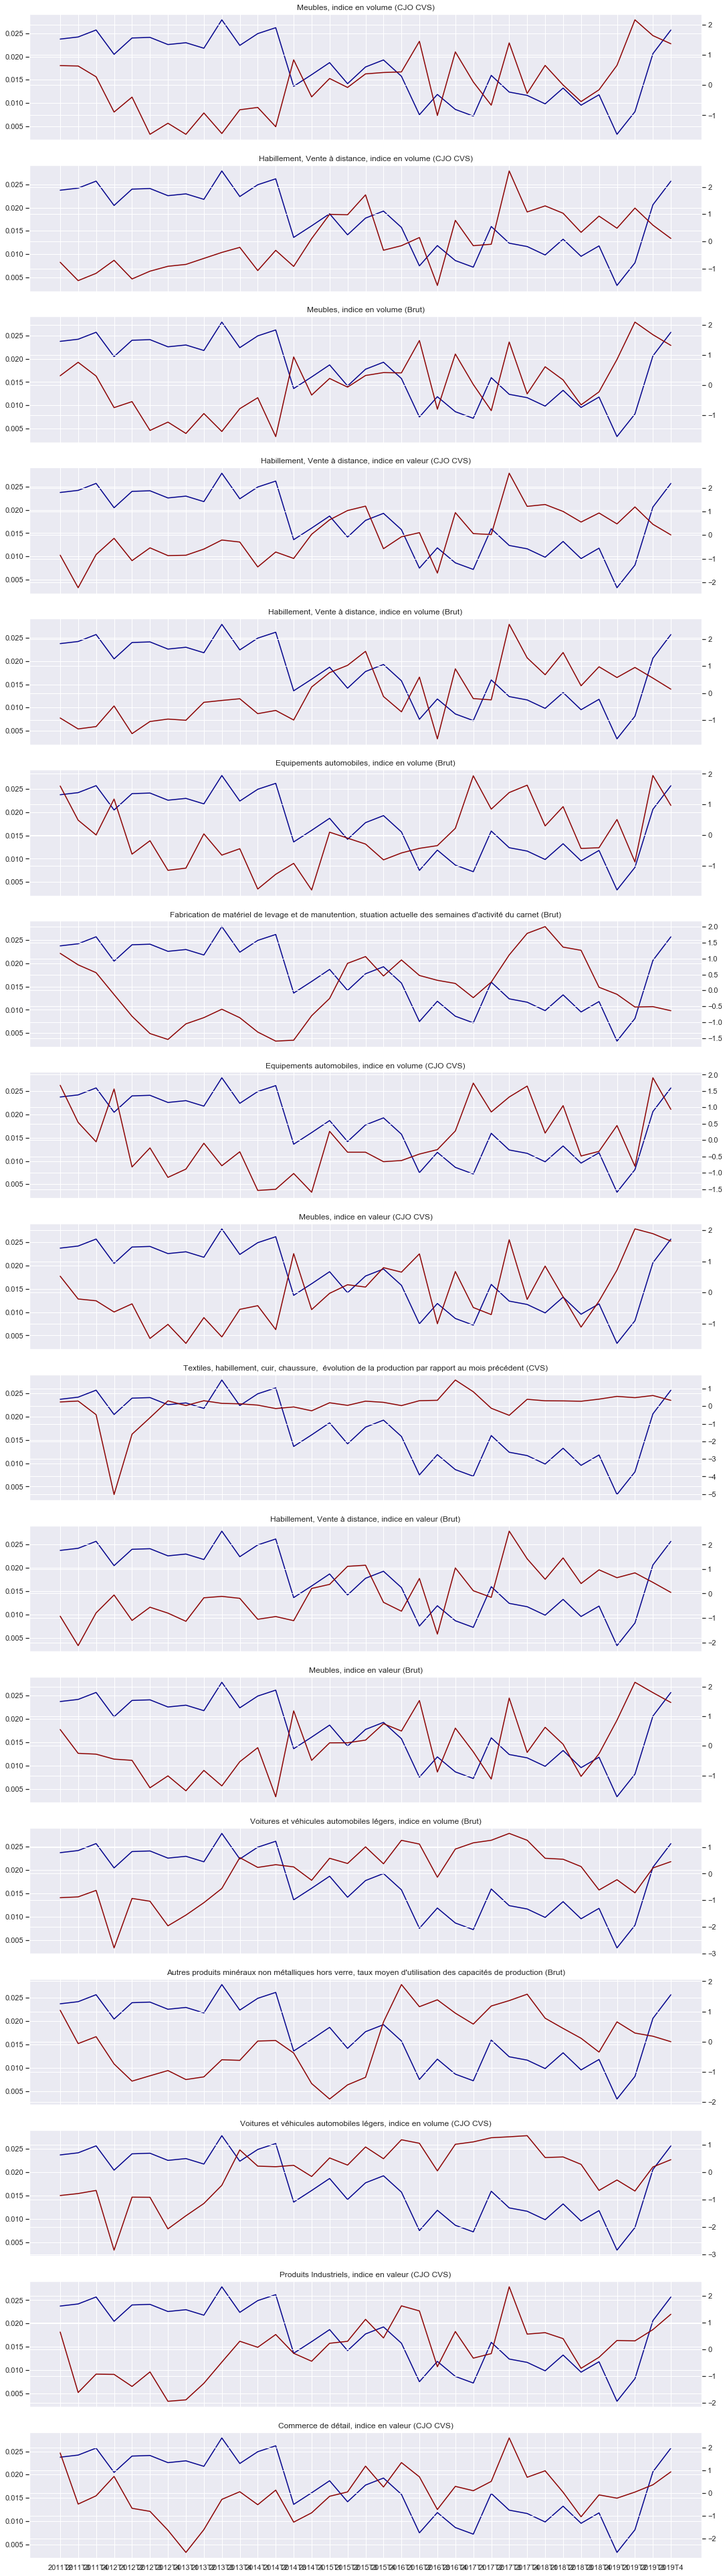

<Figure size 432x288 with 0 Axes>

In [70]:
#Graphiques de variations
sns.set()
figure3, axes3 = plt.subplots(len(X_var[correl(X_var.columns).index].columns),1,figsize=(18,70),sharex=True)
axes3twin = [None] * len(axes3)

for i in range(len(axes3)):
    axes3[i].plot(yty_var_tot[::-1],color="darkblue",label="Variation de la consommation")
    axes3twin[i] = axes3[i].twinx()
    axes3twin[i].plot(X_var[correl(X_var.columns).index][::-1].iloc[:,i],color="darkred",label="Variation de l'indice")
    axes3[i].set_title(X_var[correl(X_var.columns).index][::-1].columns[i])

plt.show()
plt.savefig('test.png')

In [71]:
variablesSelectionCvs.append('Meubles, indice en valeur (CJO CVS)')
variablesSelectionBrut.append('Meubles, indice en valeur (Brut)')

## Corrélations entre les variables sélectionnées

### Etude en CVS

In [72]:
corr_cvs=yty_var_tot.reset_index().merge(X_var[variablesSelectionCvs].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False)

In [73]:
corr_cvs_abs=abs(corr_cvs)

In [74]:
selectionCVS=corr_cvs_abs.sort_values(ascending=False).index[0:25]

A la main, on supprime les catégories "redondantes".

In [75]:
selectionCVS=selectionCVS.drop("Fabrication d'équipements électriques, taux moyen d'utilisation des capacités de production (CVS)").drop('Commerce de détail, indice en volume (CJO CVS)').drop('Petit commerce, indice en volume (CJO CVS)').drop('Alimentation générale hors boucherie, Hypermarchés, indice en valeur (CJO CVS)').drop("Fabrication d'équipements électriques, évolution des livraisons par rapport au mois précédent (CVS)").drop("Indicateur mensuel du climat des affaires dans l'industrie manufacturière (cvs)")
selectionCVS=selectionCVS.drop('Grande distribution, indice en valeur (CJO CVS)').drop('Supermarchés, indice en volume (CJO CVS)').drop('Petit commerce, indice en valeur (CJO CVS)').drop('Grande distribution, indice en volume (CJO CVS)').drop('Alimentation générale, Petit commerce traditionnel, indice en valeur (CJO CVS)').drop("Equipements électriques et électroniques, autres machines, taux moyen d'utilisation des capacités de production (CVS)")[:-2:]

In [76]:
corrMatrix = abs(X_var[selectionCVS].corr())

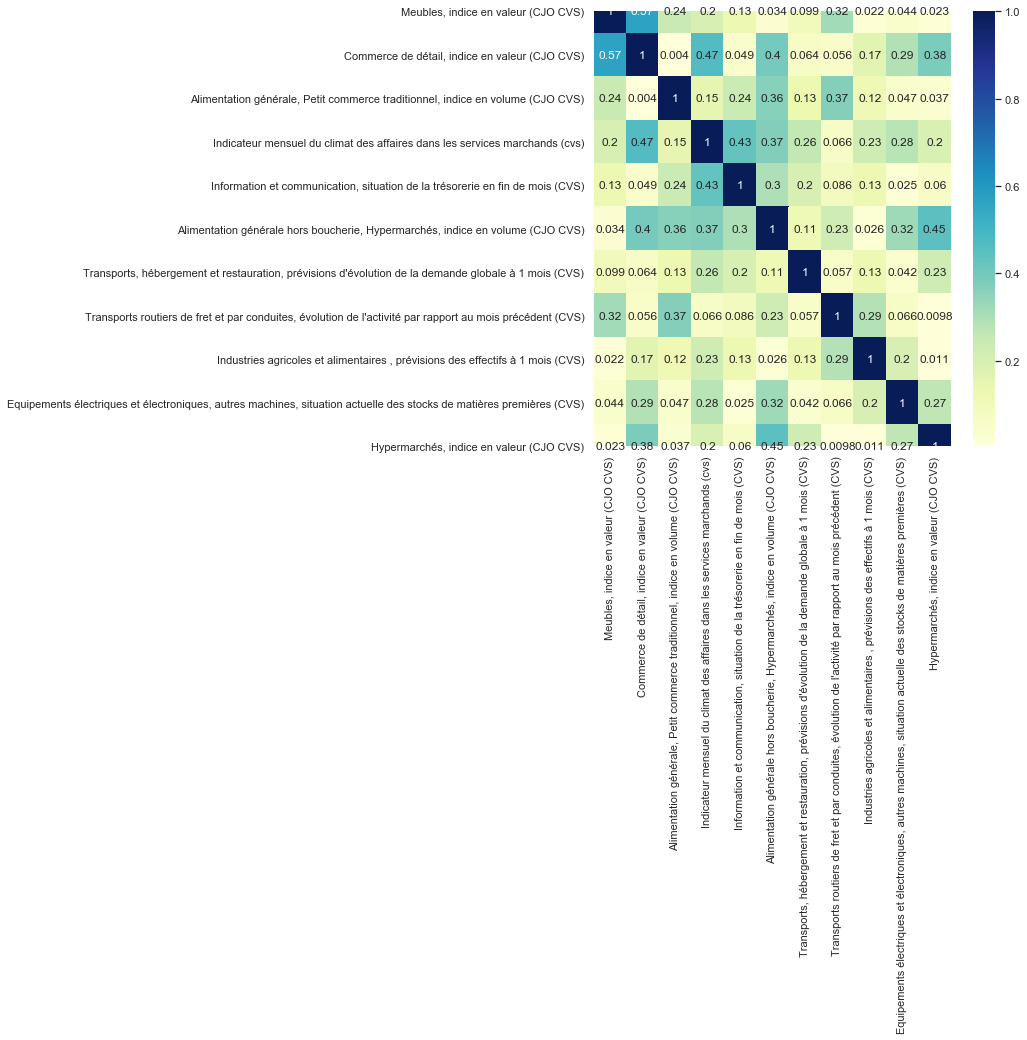

In [77]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix,cmap="YlGnBu",annot=True)

In [78]:
"""for i in range(len(selectionCVS)):
    for j in range(i):
        plt.plot(X_var[selectionCVS[j]],X_var[selectionCVS[i]],'ro')
        plt.xlabel(str(X_var[selectionCVS[j]].name))
        plt.ylabel(str(X_var[selectionCVS[i]].name))
        plt.show()"""

"for i in range(len(selectionCVS)):\n    for j in range(i):\n        plt.plot(X_var[selectionCVS[j]],X_var[selectionCVS[i]],'ro')\n        plt.xlabel(str(X_var[selectionCVS[j]].name))\n        plt.ylabel(str(X_var[selectionCVS[i]].name))\n        plt.show()"

In [79]:
#g = pd.plotting.scatter_matrix(X_var[selectionCVS], figsize=(50,50),marker='o',alpha=1)

### Etude en Brut

In [80]:
corr_brut=yty_var_tot.reset_index().merge(X_var[variablesSelectionBrut].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False)

In [81]:
corr_brut_abs=abs(corr_brut)

In [82]:
selectionBrut=corr_brut_abs.sort_values(ascending=False).index[0:25]

In [83]:
corrMatrix = abs(X_var[selectionBrut].corr())
index=corrMatrix.sort_index(axis=0,ascending=True).reset_index()['index']

In [84]:
selectionBrut=selectionBrut.drop(index[19:21]).drop(index[14:16]).drop(index[4:6]).drop(index[10:14]).drop(index[7]).drop(index[22:24])[:-2:]

In [85]:
corrMatrix = abs(X_var[selectionBrut].corr())

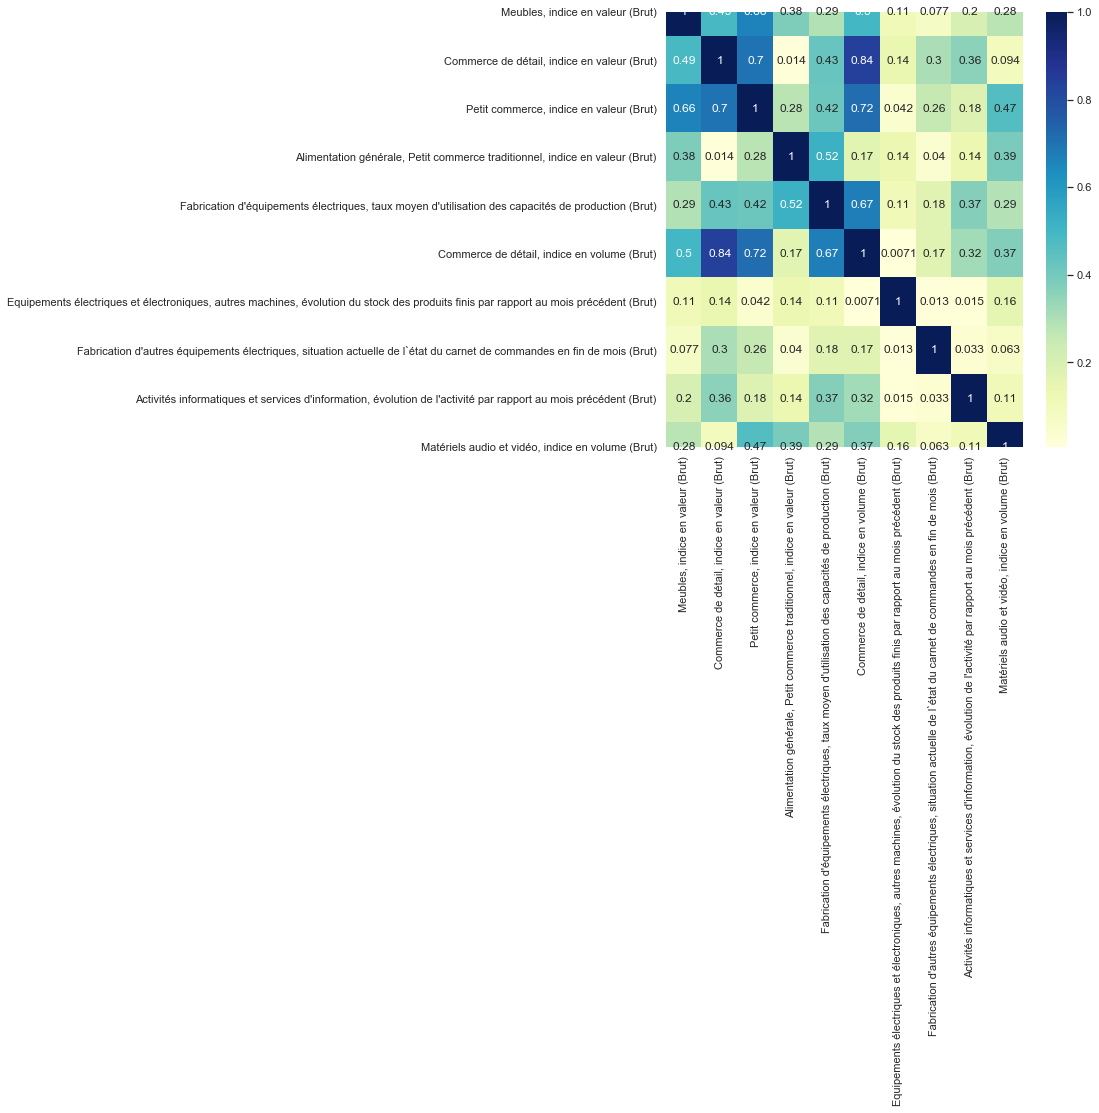

In [86]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix,cmap="YlGnBu",annot=True)

## Nom de la sélection

Pour la sélection en CVS : 

In [87]:
selectionCVS

Index(['Meubles, indice en valeur (CJO CVS)',
       'Commerce de détail, indice en valeur (CJO CVS)',
       'Alimentation générale, Petit commerce traditionnel, indice en volume (CJO CVS)',
       'Indicateur mensuel du climat des affaires dans les services marchands (cvs)',
       'Information et communication, situation de la trésorerie en fin de mois (CVS)',
       'Alimentation générale hors boucherie, Hypermarchés, indice en volume (CJO CVS)',
       'Transports, hébergement et restauration, prévisions d'évolution de la demande globale à 1 mois (CVS)',
       'Transports routiers de fret et par conduites, évolution de l'activité par rapport au mois précédent (CVS)',
       'Industries agricoles et alimentaires , prévisions des effectifs à 1 mois (CVS)',
       'Equipements électriques et électroniques, autres machines, situation actuelle des stocks de matières premières (CVS)',
       'Hypermarchés, indice en valeur (CJO CVS)'],
      dtype='object')

Pour la sélection en brut : 

In [88]:
selectionBrut

Index(['Meubles, indice en valeur (Brut)',
       'Commerce de détail, indice en valeur (Brut)',
       'Petit commerce, indice en valeur (Brut)',
       'Alimentation générale, Petit commerce traditionnel, indice en valeur (Brut)',
       'Fabrication d'équipements électriques, taux moyen d'utilisation des capacités de production (Brut)',
       'Commerce de détail, indice en volume (Brut)',
       'Equipements électriques et électroniques, autres machines, évolution du stock des produits finis par rapport au mois précédent (Brut)',
       'Fabrication d'autres équipements électriques, situation actuelle de l`état du carnet de commandes en fin de mois (Brut)',
       'Activités informatiques et services d'information, évolution de l'activité par rapport au mois précédent (Brut)',
       'Matériels audio et vidéo, indice en volume (Brut)'],
      dtype='object')

## Échantillonnage de données mélangées, sans contraintes
Unconstrained mixed data sampling - UMIDAS

Soit $t$ dénotant les mois. Les trimestres sont donc dénotés par $3t$. Les séries doivent être stationnaires.

\begin{align*}

Y_{3t} = \alpha + \Phi(B)Y_{3t} + \beta(B)X_{3t}^{'} + \epsilon_t
\\
\text{où :} 
\left\{\begin{array} \, X_t = & (X_{1,t}, \cdots, X_{k,t})
\\
\Phi(B) = & \sum_{i=1}^{p} \Phi_i B^{3i}
\\
\beta(B) = & (\sum_{i=0}^{3p} \beta_{i,1} B^i , \cdots, \sum_{i=0}^{3p} \beta_{i,k} B^i)
\end{array} \right.

\end{align*}

Estimation par MCO : 

\begin{align*}

\hat{\alpha}_{MCO}, \hat{\Phi}_{MCO},\hat{\beta}_{MCO} = \underset{\alpha, \Phi, \beta}{arg min} \sum_{t=p}^T (Y_{3t} - \alpha - \Phi(B)Y_{3t} - \beta(B)X_{3t}^{'})^2

\end{align*}

En posant : 

\begin{align*}

Z_{3t} = (1,Y_{3(t-1)}, \cdots, Y_{3(t-p)}, X_{1,3t},X_{1,3t-1},\cdots, X_{1,3t-3p},X_{2,3t},\cdots, X_{k,3t-3p})

\end{align*}

Le problème se réécrit :

\begin{align*}

\underset{\omega \in \mathbb{R}^{1 + p + k(3p+1)}}{arg min} \sum_{t=p}^{T} (Y_{3t} - \omega Z_{3t}^{'} )^2

\end{align*}

Il y a une solution explicite :

\begin{align*}

\hat{\omega}_{MCO} = \mathbb{E}[Z_{3t}^{'} Z_{3t}]^{-1} \mathbb{E}[Z_{3t}^{'}Y_{3t}] \approx (\sum_{t=p}^T Z_{3t}^{'} Z_{3t})^{-1} \sum_{t=p}^TZ_{3t}^{'}Y_{3t}

\end{align*}

Ainsi la prévision nowcast devient :

\begin{align*}

\hat{Y}_{3t + 3} = \hat{\omega}_{MCO} Z_{3t + 3}^{'}

\end{align*}

### Que fait-on lorsque nous n'avons pas tous les mois du trimestre ?

Les données passent de $Z_{3t} = (1,Y_{3(t-1)}, \cdots, Y_{3(t-p)}, X_{1,3t},X_{1,3t-1},\cdots, X_{1,3t-3p},X_{2,3t},\cdots, X_{k,3t-3p})$ à $Z_{3t,mois} = (1,Y_{3(t-1)}, \cdots, Y_{3(t-p)}, X_{1,3t} \mathbb{1}_{\% 3 \leq mois}(3t),X_{1,3t-1}\mathbb{1}_{\% 3 \leq mois}(3t - 1),\cdots, X_{1,3t-3p} \mathbb{1}_{\% 3 \leq mois}(3t-3p),X_{2,3t} \mathbb{1}_{\% 3 \leq mois}(3t),\cdots, X_{k,3t-3p}\mathbb{1}_{\% 3 \leq mois}(3t-3p))$ où \% désigne le reste de la division euclidienne, et où une valeur constante nulle signifie une absence de donnée.

Une idée peut être de d'abord faire une régression (AR(3p)) des mois suivants en fonction des mois précédents de chaque variable explicative.

On prévoit alors ainsi :

\begin{align*}

\hat{Y}_{3t + 3} = \hat{\omega}_{MCO} \tilde{Z}_{3t + 3}^{'}

\end{align*}

avec $\tilde{Z}_{3t + 3}^{'}$ le vecteur $Z_{3t,mois}$ où l'on a remplacé les zéros par la prédiction par AR(3p) des valeurs manquantes.

La première étape consiste à tout stationnariser

In [89]:
''' Mise au format datetime des index '''

import datetime as dt
lesdates = []
dernierJour = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}
for i in range(len(yty_var_tot)*3):
    annee = 2011+((i+4)//12)
    mois = (i+4)%12
    if mois == 0:
        mois += 12
        annee -= 1
    jour = dernierJour[mois]
    if (annee - 2008)%4 == 0 and mois == 2:
        jour = 29
    lesdates.append(dt.date(annee,mois,jour))
lesdates = pd.Index(lesdates)


In [90]:
''' Stationnarisation de yty_var '''

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
regX = pd.DataFrame()
regX['Constante'] = pd.Series(np.ones(len(yty_var_tot)))
regX['Temps'] = pd.Series(np.arange(1,len(yty_var_tot)+1))
regX.index = yty_var_tot.index

sm.OLS(yty_var_tot.iloc[:,0],regX).fit().pvalues # Tendance ct

Constante    0.000007
Temps        0.000008
dtype: float64

In [91]:
adfuller(yty_var_tot.iloc[:,0],regression = 'ct', maxlag=8, autolag='t-stat')[1] 

0.41837583922196697

In [92]:
yty_var_tot = pd.DataFrame({'Variations de la consommation':var, 'Date':list(conso.index)[4:]})
yty_var_tot = yty_var_tot.set_index('Date').loc['2011T1':]
yty_var_tot = yty_var_tot.diff().iloc[1:,:]
yty_var_tot.index = lesdates[np.arange(2,len(lesdates),3)]
regX = pd.DataFrame()
regX['Constante'] = pd.Series(np.ones(len(yty_var_tot)))
regX['Temps'] = pd.Series(np.arange(1,len(yty_var_tot)+1))
regX.index = yty_var_tot.index
sm.OLS(yty_var_tot.iloc[:,0],regX).fit().pvalues # On appliquera le paramètre nc

adfuller(yty_var_tot.iloc[:,0],regression = 'nc', maxlag=8, autolag='t-stat')[1] # C'est bien stationnaire

3.5520983189440084e-06

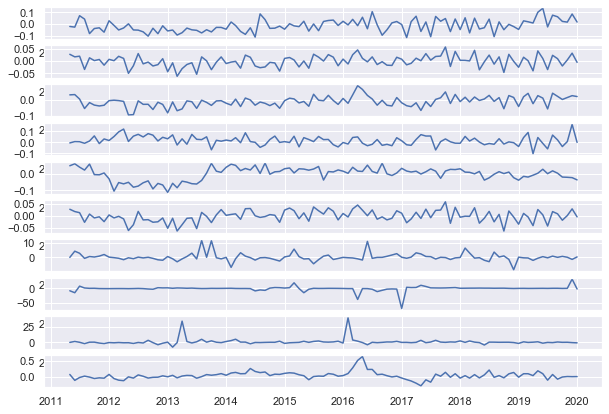

In [93]:
X_selectb = (X[selectionBrut].iloc[:117,:][::-1].diff(periods=12)/X[selectionBrut].iloc[:117,:][::-1].shift(periods=12)).iloc[12:,:] # On calcule en yty_var
X_selectb.index = lesdates
figg, axx = plt.subplots(len(X_selectb.columns), figsize=(10,7))
for i in range(len(X_selectb.columns)):
    axx[i].plot(X_selectb.iloc[:,i])
plt.show()

In [94]:
''' Stationnarisation de X '''

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller 

regX = pd.DataFrame()
regX['Constante'] = pd.Series(np.ones(len(X_selectb)))
regX['Temps'] = pd.Series(np.arange(1,len(X_selectb)+1))
regX.index = X_selectb.index
ts = []
for i in range(len(X_selectb.columns)):
    ts.append((sm.OLS(X_selectb.iloc[:,i],regX).fit().pvalues < 0.05)) # On regarde pour chaque variable s'il y a une tendance déterministe


adftest = [] # On fait un test ADF pour chacune

for i in range(len(X_selectb.columns)):
    regressionmode = ''
    if ts[i][0] :
        regressionmode += 'c'
        if ts[i][1] :
            regressionmode += 't'
    else:
        regressionmode = 'nc'
    adftest.append(adfuller(X_selectb.iloc[:,i],regression = regressionmode, maxlag=24, autolag='t-stat')[1] < 0.05)

adftest # Il faut en différentier quelques-unes

[False, False, True, False, True, True, True, True, True, False]

In [95]:
X_selectb = (X[selectionBrut].iloc[:118,:][::-1].diff(periods=12)/X[selectionBrut].iloc[:118,:][::-1].shift(periods=12)).diff(periods=1).iloc[13:,:] # On prend une période de plus
X_selectb.index = lesdates

In [96]:
# On recommence les tests
regX = pd.DataFrame()
regX['Constante'] = pd.Series(np.ones(len(X_selectb)))
regX['Temps'] = pd.Series(np.arange(1,len(X_selectb)+1))
regX.index = X_selectb.index
ts = []
for i in range(len(X_selectb.columns)):
    ts.append((sm.OLS(X_selectb.iloc[:,i],regX).fit().pvalues < 0.05))

adftest = []

for i in range(len(X_selectb.columns)):
    regressionmode = ''
    if ts[i][0] :
        regressionmode += 'c'
        if ts[i][1] :
            regressionmode += 't'
    else:
        regressionmode = 'nc'
    adftest.append(adfuller(X_selectb.iloc[:,i],regression = regressionmode, maxlag=24, autolag='t-stat')[1] < 0.05)

adftest # Tout est stationnaire

[True, True, True, True, True, True, True, True, True, True]

In [97]:
''' Calcul de omega '''

p = 4 # On fixe l'ordre de régression p, il faudrait enquêter sur les autocorrélations
k = len(X_selectb.columns)

Z = pd.DataFrame() # Pour tout t, on construit Z_3t dans une liste
for t in np.arange(p,len(yty_var_tot)):
    z = [1]
    for i in np.arange(1,p): # On rajoute les Y_3(t-i)
        z.append(np.float64(yty_var_tot.iloc[t-i]))
    for j in range(k): # On rajoute les X_3t-i
        for l in np.arange(0,3*p):
            z.append(np.float64(X_selectb.iloc[(3*t)-l,j])) # Vérifier qu'on a les bons index
    Z[t] = pd.Series(z)

sumdesign = Z @ Z.T
inv_sumdesign = pd.DataFrame(np.linalg.pinv(sumdesign.values)) # Ensuite, on calcule la somme des matrices de design et son inverse
secondfactor = pd.DataFrame(Z.values @ yty_var_tot.iloc[p:].values) # On calcule également la somme des produits Z_3t' par Y_3t

omega = inv_sumdesign @ secondfactor # On multiplie l'inverse de la somme des matrices de design par la somme des produits.

Pour vérifier l'efficacité, on calcule les résidus $Y_{mois} - \hat{\omega} Z_{mois}$

In [98]:
''' Calcul des résidus sur l'échantillon d'entraînement '''

fcst = pd.DataFrame()
for t in np.arange(p,len(yty_var_tot)):
    fcst[t] = omega.T @ Z[t]

fcst = fcst.T
fcst.index = yty_var_tot.index[p:]

epsilon = yty_var_tot['Variations de la consommation'] - fcst[0]

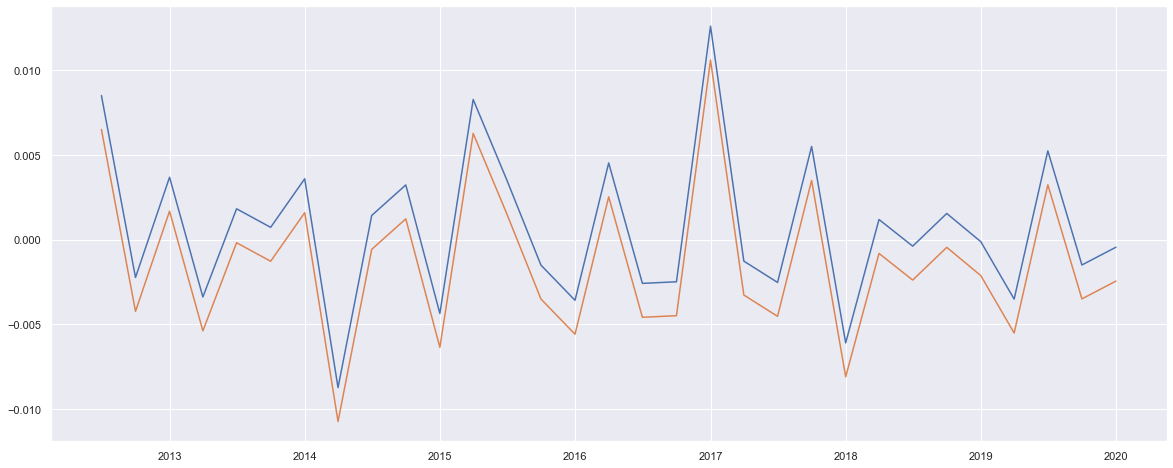

In [99]:
figure, axe = plt.subplots(figsize=(20,8))
axe.plot(fcst.index, fcst)
axe.plot(fcst.index, yty_var_tot[p:]-0.002) # On décale un tout petit peu pour voir qqch
plt.show()

On remarque que le modèle "fit" très bien aux données. Aussi, nous nous sommes placés dans un cadre optimal ou la seule information non disponible est $Y_t$. Nous allons déjà comparer ce modèle à un modèle "naïf" de type ARMA. Ensuite, nous allons étudier le modèle UMIDAS lorsque nous n'avons pas toutes les informations sur les $X_t$.

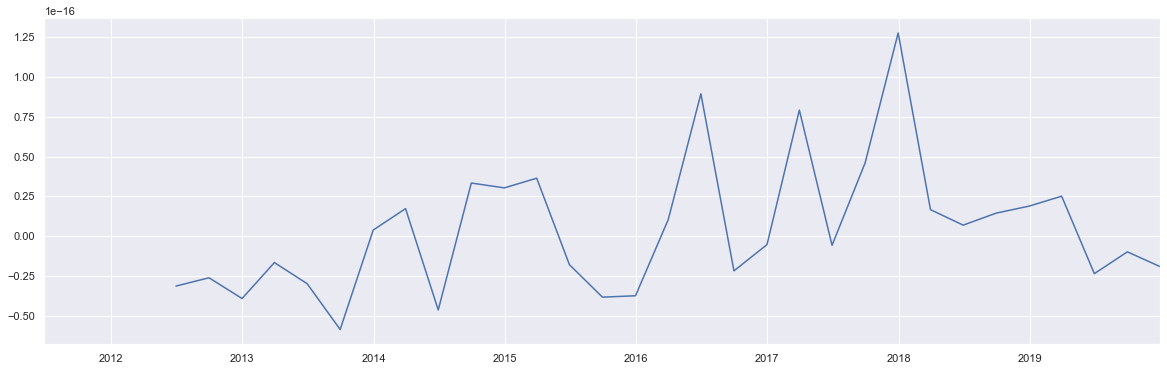

In [100]:
epsilon.plot(figsize=(20,6))
plt.show()

In [101]:
midas_error = (epsilon**2).sum() # On calcule l'erreur quadratique
# On calcule aussi l'AIC, le BIC ? (Comparabilité des modèles ?)

#### Comparaison au modèle baseline

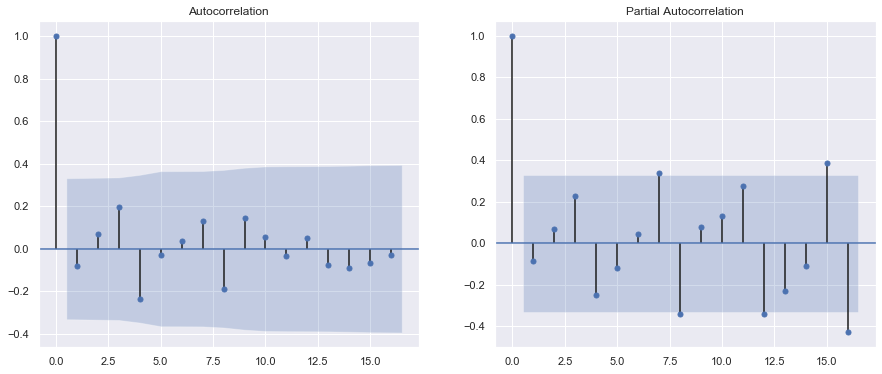

In [102]:
''' On calibre un modèle SARIMA '''

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

figgg, axxxs = plt.subplots(1,2,figsize=(15,6))
plot_acf(yty_var_tot, ax=axxxs[0])
plot_pacf(yty_var_tot, ax=axxxs[1])
plt.show() # On voit qu'on peut essayer les modèles AR(8), AR(12) et AR(16)

In [103]:
AR8 = sm.tsa.SARIMAX(yty_var_tot, order=(8,0,0)).fit()
AR12 = sm.tsa.SARIMAX(yty_var_tot, order=(12,0,0)).fit()
AR16 = sm.tsa.SARIMAX(yty_var_tot, order=(16,0,0)).fit()
AR8.bic , AR12.bic, AR16.bic

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/us

(-240.07333001914577, -228.20198238320563, -218.8566573676287)

In [104]:
AR8.aic , AR12.aic, AR16.aic # Le modèle AR(8) est le meilleur des 3

(-254.0714625725505, -248.421507182568, -245.29757441294873)

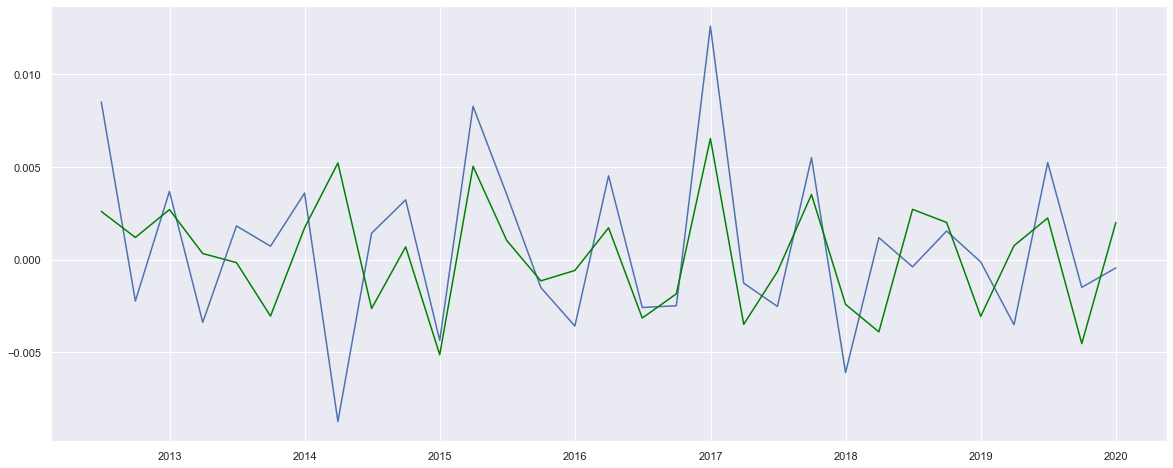

In [105]:
arpredict = AR8.get_prediction()
figure, axe = plt.subplots(figsize=(20,8))
#axe.plot(fcst.index, fcst - 0.002)
axe.plot(fcst.index, yty_var_tot[p:]) # On décale un tout petit peu pour voir qqch
axe.plot(fcst.index, arpredict.predicted_mean[p:], color='green')
plt.show()

In [106]:
epsilon2 = AR8.resid[p:]
ar8_error = (epsilon2**2).sum()

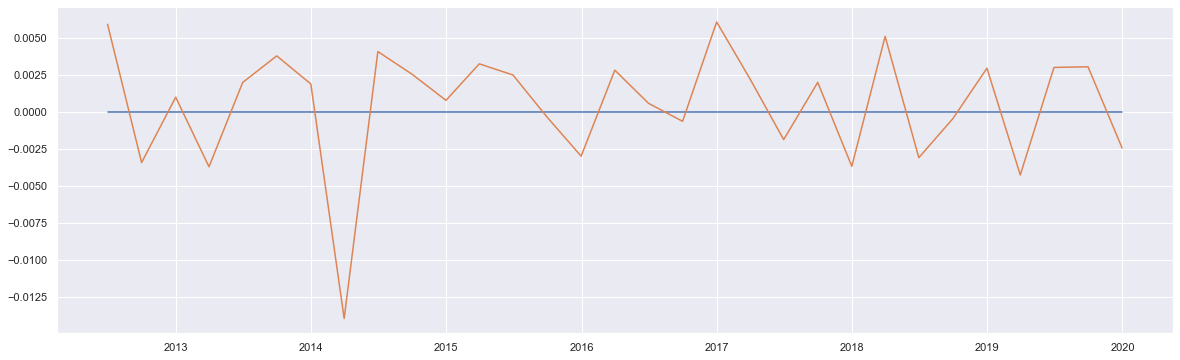

In [107]:
figure, axe = plt.subplots(figsize=(20,6))
axe.plot(epsilon)
axe.plot(epsilon2)
#axe.set_yscale('log')
plt.show()

Le UMIDAS est clairement plus performant que le modèle AR sur la période étudiée. Toutefois, il s'agit d'un échantillon d' "entraînement". Nous ne disposons pas vraiment d'échantillon de test. En tant que proxy, on peut tenter de backtester ces deux méthodes sur des périodes antérieures.

Avant cela, nous voulons donner des approximations linéaires des inputs, que nous allons utiliser comme "plug-ins" dans la formule de prédiction. On évalue tout d'abord la possibilité d'un modèle VAR(3p)

In [108]:
''' Etude de la cointégration et des relations linéaires entre les variables '''

# Relations de cointégrations entre les composantes de X_selectb

# On a déjà vu qu'avant différentiation, X_selectb est I(1)
# Nous allons régresser la première composante sur les autres pour regarder si d'éventuelles cointégrations existent

X_selectb = (X[selectionBrut].iloc[:117,:][::-1].diff(periods=12)/X[selectionBrut].iloc[:117,:][::-1].shift(periods=12)).iloc[12:,:]
X_selectb.index = lesdates
mod = sm.OLS(X_selectb.iloc[:,0], sm.add_constant(X_selectb.iloc[:,1:]))
res = mod.fit()

residuals = X_selectb.iloc[:,0] - res.get_prediction().predicted_mean


In [109]:
adfuller(residuals,regression = 'nc', maxlag=24, autolag='t-stat')[1]

0.14753584960799043

On ne peut pas rejeter l'hypothèse que le résidu de la régression est à racine unité, et qu'il n'est donc pas stationnaire. On remarque aussi que les p-valeurs de la régression préalable sont fort peu significatives, ce qui est rassurant puisque nous avons voulu prendre des variables aussi "orthogonales" que possible.

Par conséquent, nous n'allons pas faire de VAR(3p), mais un ARMA pour chaque variable que nous avons différentiée.

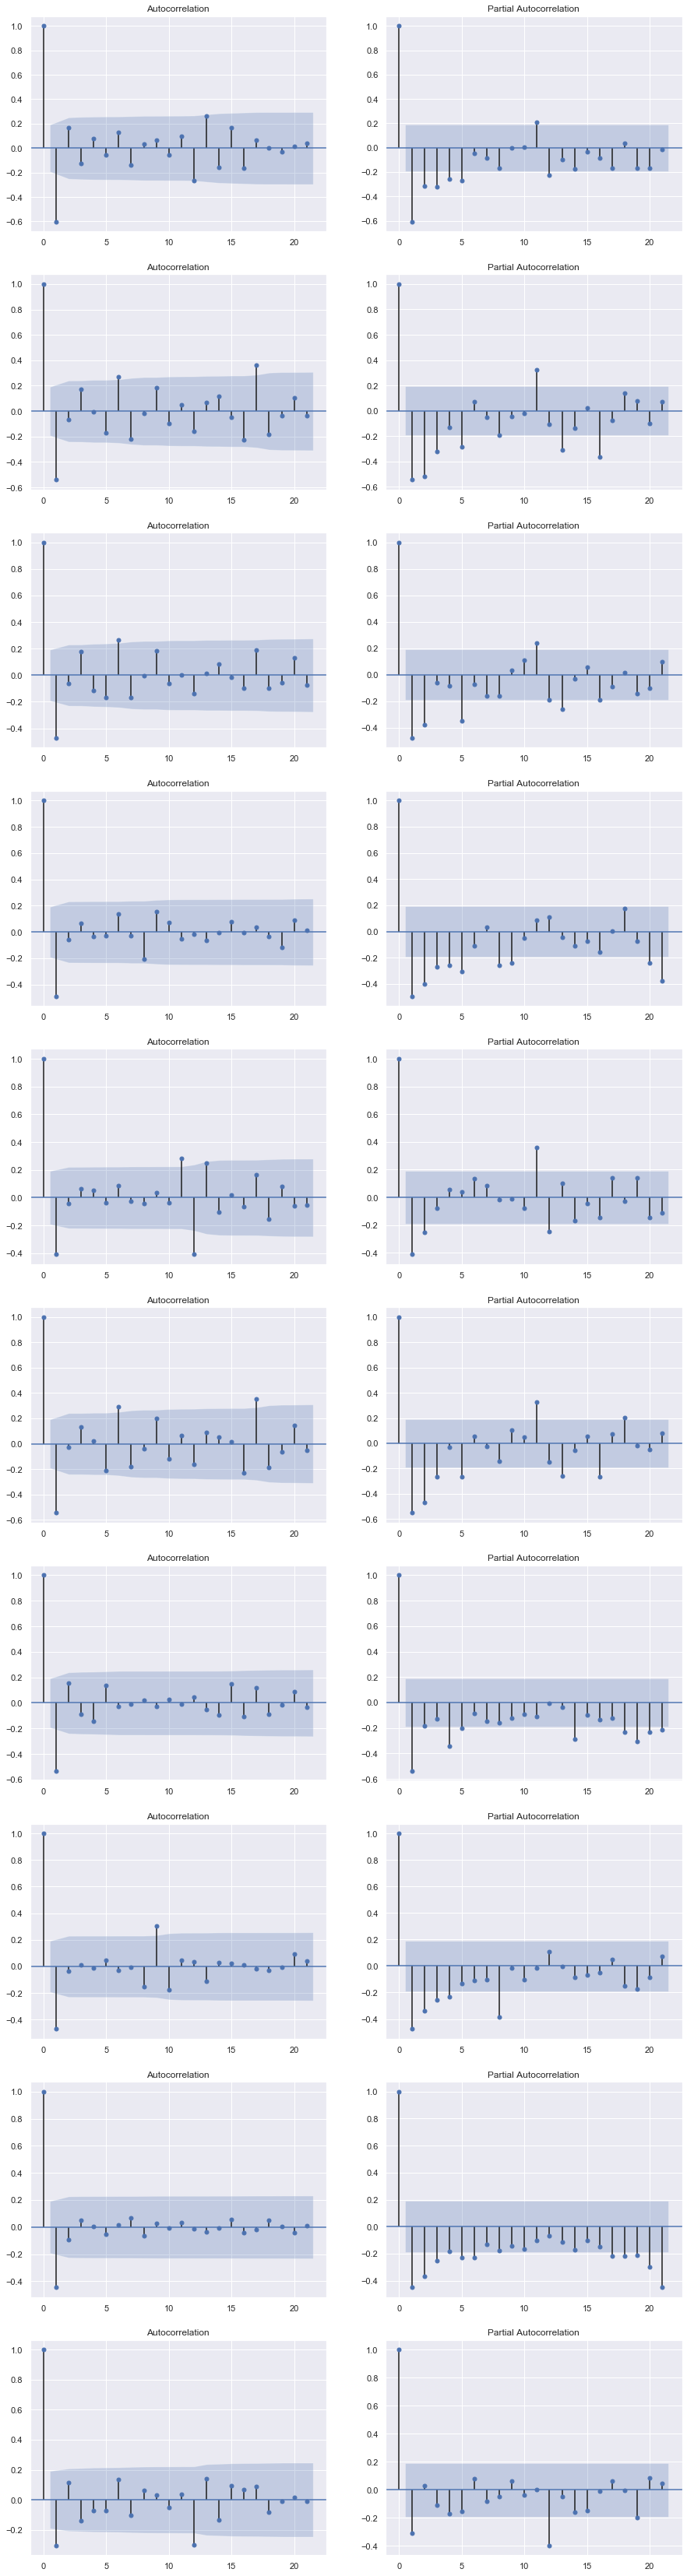

In [110]:
X_selectb = (X[selectionBrut].iloc[:118,:][::-1].diff(periods=12)/X[selectionBrut].iloc[:118,:][::-1].shift(periods=12)).diff(periods=1).iloc[13:,:]
X_selectb.index = lesdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

figgg, axxxs = plt.subplots(len(X_selectb.columns),2,figsize=(15,60))
for i,col in enumerate(X_selectb.columns):
    plot_acf(X_selectb[col], ax=axxxs[i,0])
    plot_pacf(X_selectb[col], ax=axxxs[i,1])
plt.show()

In [111]:
# On fit les ARMA correspondants

ARMAs = []
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,0], order=(5,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,1], order=(5,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,2], order=(5,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,3], order=(5,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,4], order=(2,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,5], order=(5,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,6], order=(5,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,7], order=(4,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,8], order=(3,0,1)).fit())
ARMAs.append(sm.tsa.SARIMAX(X_selectb.iloc[:,9], order=(1,0,1)).fit())

ARMAs[0].summary()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                  
============================================================================================
Dep. Variable:     Meubles, indice en valeur (Brut)   No. Observations:                  105
Model:                             SARIMAX(5, 0, 1)   Log Likelihood                 168.993
Date:                              Sat, 09 May 2020   AIC                           -323.986
Time:                                      15:05:19   BIC                           -305.409
Sample:                                  04-30-2011   HQIC                          -316.458
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8952      0.455     -1.968      0.049      -1.787      -0.004
ar.L2         -0.6879      0.450     -1.529      0.126      -1.570       0.194
ar.L3         -0.5992      0.316     -1.896      0.058      -1.219       0.020
ar.L4         -0.4113      0.269     -1.532      0.126      -0.938       0.115
ar.L5         -0.2144      0.169     -1.271      0.204      -0.545       0.116
ma.L1         -0.1205      0.457     -0.264      0.792      -1.016       0.775
sigma2         0.0023      0.000      7.117      0.000       0.002       0.003
===================================================================================
Ljung-Box (Q):                       39.33   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.50   Prob(JB):                         0.73
Heteroskedasticity (H):               2.27   Skew:                             0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Le modèle ARMA expliquant la première variable passe le test Portmanteau. Pour avoir une vision plus fine pour tous les ARMAs, nous allons représenter graphiquement les autocorrélations et autocorrélations partielles des résidus.

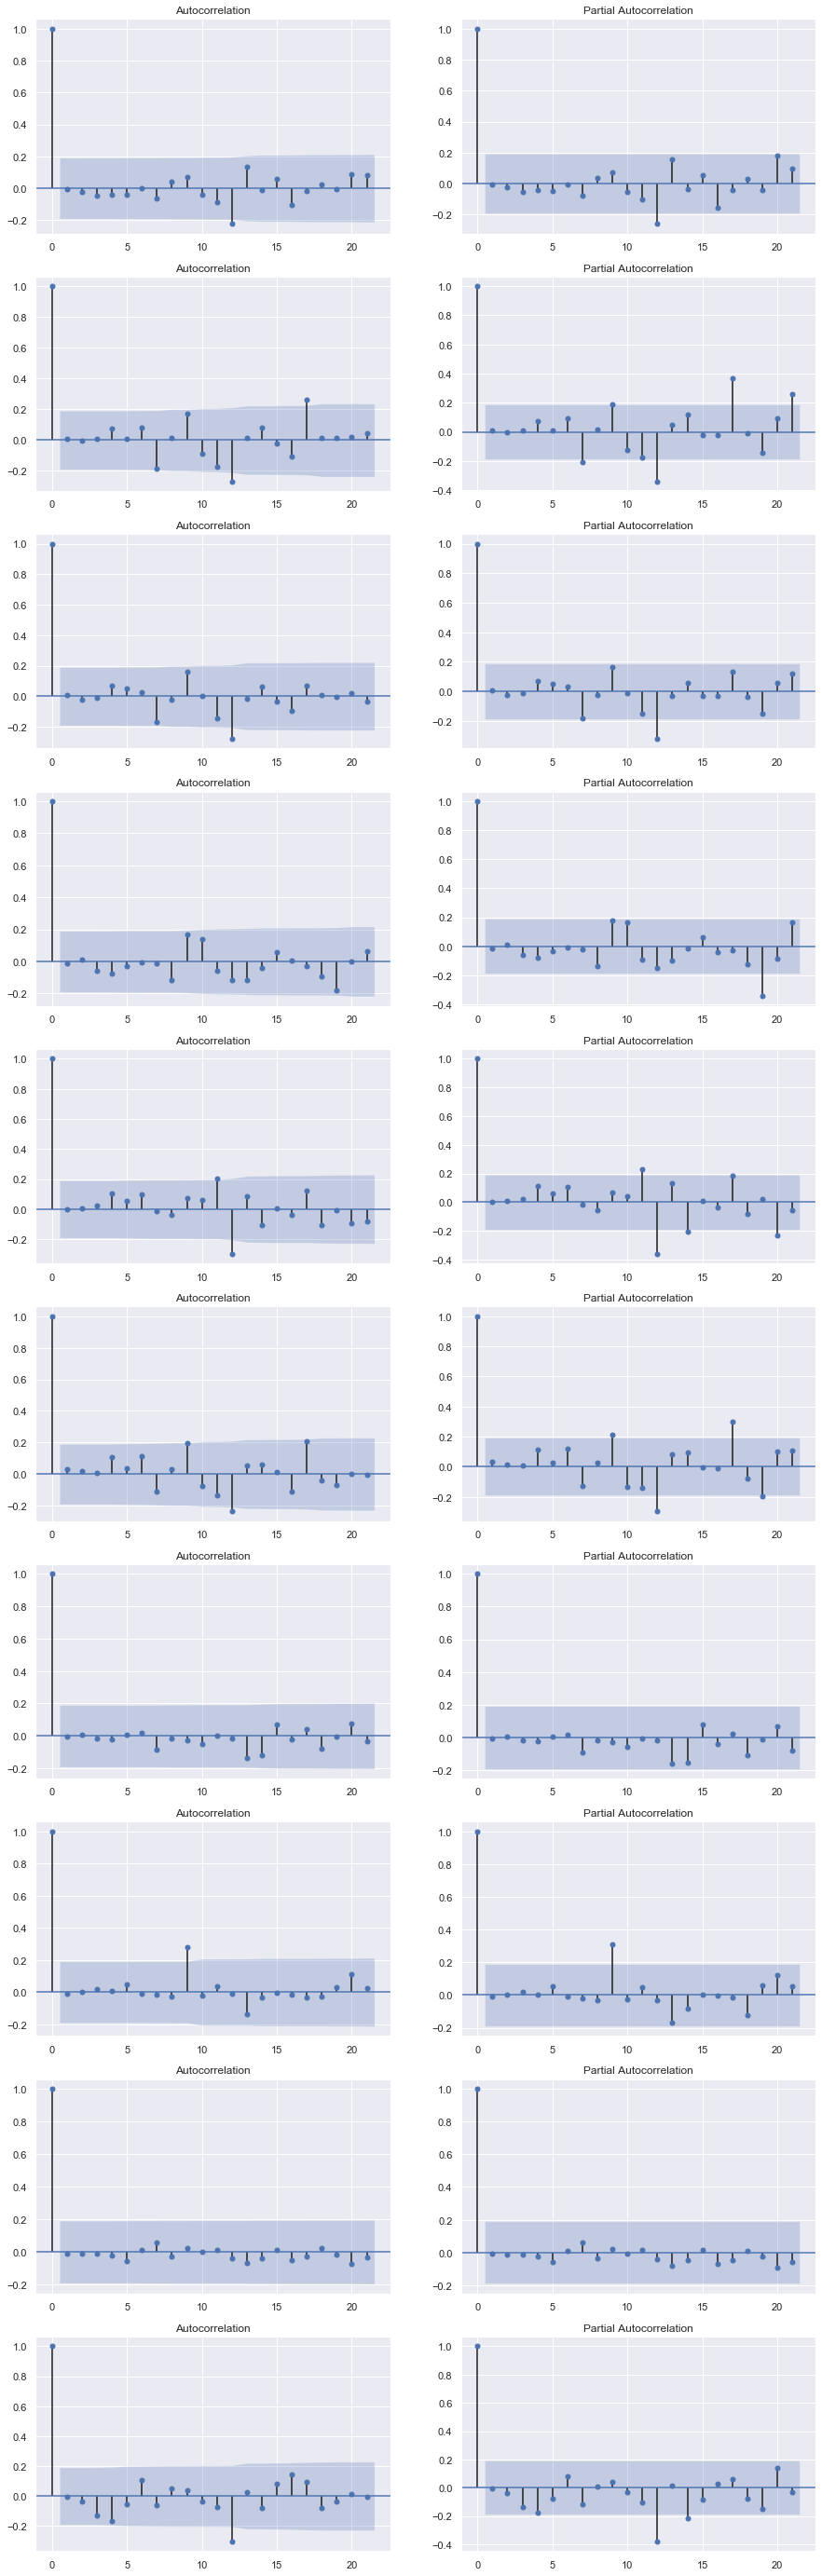

In [112]:
figure, axe = plt.subplots(len(ARMAs),2, figsize=(15,50))
for i in range(len(ARMAs)):
    plot_acf(ARMAs[i].resid, ax=axe[i,0])
    plot_pacf(ARMAs[i].resid, ax=axe[i,1])
plt.show()

Bien que certains résidus présentent encore quelques corrélations, nous nous contenterons pour l'instant de ces modèles.

L'objectif est maintenant de construire le vecteur $\tilde{Z}_t$ en y introduisant les valeurs prédites pour les $X_t$.

La démarche est la suivante :
* On regarde combien de mois il nous manque avant le dernier mois du trimestre (0, 1 ou 2)
* Pour chaque variable explicative différentiée, on réalise la prédiction ARMA, pour chaque période manquante
* On remplit le vecteur $\tilde{Z}_t$ avec ces estimations.

In [113]:
''' Combien de mois nous manque-t-il avant la fin du trimestre ? '''

from datetime import date

manquant = (3-date.today().month % 3)%3

''' Prédiction ARMA '''

p = 4 # On fixe l'ordre de régression p, il faudrait enquêter sur les autocorrélations
k = len(X_selectb.columns)

X_tilde = X_selectb
predictions = pd.DataFrame()

for j,col in enumerate(X_tilde.columns):
    predictions[col] = pd.Series(ARMAs[j].get_forecast(steps = manquant).predicted_mean)

X_tilde = pd.concat([predictions,X_tilde[::-1]],ignore_index = True)[::-1]

''' Construction de Z_tilde '''

Z_tilde = pd.DataFrame()
z=[1]
T = len(yty_var_tot)
for i in np.arange(1,p):
    z.append(np.float64(yty_var_tot.iloc[T-i]))
for j in range(k):
    for l in np.arange(0,3*p):
            z.append(np.float64(X_tilde.iloc[(3*T)-l,j]))

Z_tilde[T] = pd.Series(z)


Il nous faudra encore ajuster le code en fonction des retards de publication (il y a juste à ajuster la variable "manquant").

Pour tester ce dernier mode de prédiction, nous allons donc commencer par construire la série $(\tilde{Z}_t)$ pour chaque mois (à partir du 4e trimestre car le paramètre p est de 4). Nous allons donc indexer ainsi :
$$ \tilde{Z}_{i} $$
avec $i$ le numéro du mois.

In [114]:
''' Construction de la série des Z_i '''

p = 4
k = len(X_selectb.columns)

Zitilde = pd.DataFrame()
for i in np.arange(p*5,len(X_selectb)):

    manquanti = (3 - i%3)%3
    X_tilde = X_selectb.iloc[:i,:]
    if manquanti == 1:
        predictions = pd.DataFrame()
        for j,col in enumerate(X_tilde.columns):
            predictions[col] = pd.Series(ARMAs[j].get_prediction(start=i+1 ,end=i+1 ,dynamic=True).predicted_mean)
        X_tilde = pd.concat([predictions,X_tilde[::-1]],ignore_index = True)[::-1]
    elif manquanti == 2:
        predictions = pd.DataFrame()
        for j,col in enumerate(X_tilde.columns):
            predictions[col] = pd.Series(ARMAs[j].get_prediction(start=i+1 ,end=i+2 ,dynamic=True).predicted_mean)
        X_tilde = pd.concat([predictions,X_tilde[::-1]],ignore_index = True)[::-1]


    z=[1]
    T = int((i + manquanti)/3)
    for compteur in np.arange(1,p):
        z.append(np.float64(yty_var_tot.iloc[T-compteur]))
    for j in range(k):
        for l in np.arange(0,3*p):
            z.append(np.float64(X_tilde.iloc[3*T-1-l,j]))

    Zitilde[i] = pd.Series(z)

In [115]:
Y_train = yty_var_tot.iloc[:25]
Y_test = yty_var_tot.iloc[25:]
X_train = X_selectb.iloc[:75,:]
X_test = X_selectb.iloc[75:,:]

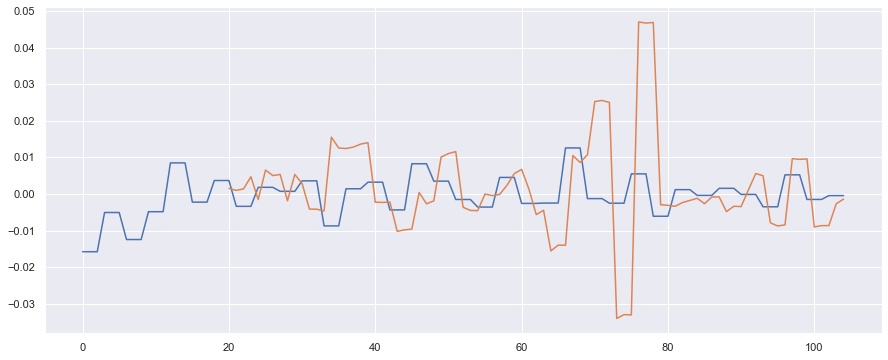

In [116]:
yty_var_tot3 = pd.DataFrame()
for i in range(len(X_selectb)):
    yty_var_tot3[i] = pd.Series(np.float64(yty_var_tot.iloc[i//3]))
yty_var_tot3

imperfect = omega.T @ Zitilde

figure, axe = plt.subplots(figsize=(15,6))
axe.plot(yty_var_tot3.T)
axe.plot(imperfect.T)
plt.show()

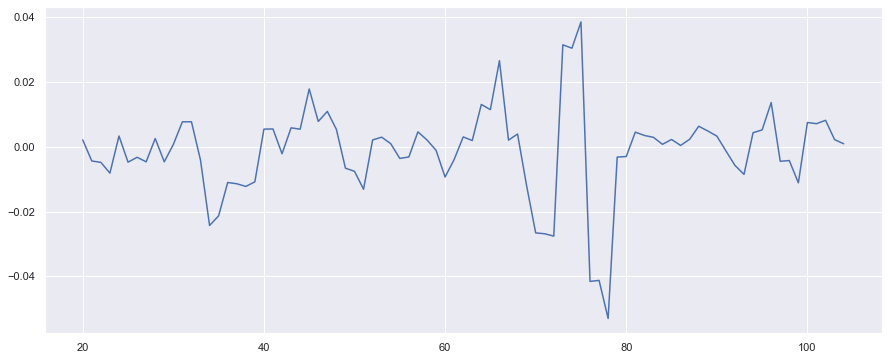

In [117]:
figure, axe = plt.subplots(figsize=(15,6))
axe.plot(yty_var_tot3.T - imperfect.T)
plt.show()
train_mse_midaspred=(((yty_var_tot3.T - imperfect.T)**2).iloc[:len(X_train)]).sum()
test_mse_midaspred=(((yty_var_tot3.T - imperfect.T)**2).iloc[len(X_train):]).sum()

Les résultats sont mauvais. Une approche, dite "directe" (cf. Marcellino et al, 2006), est de recalculer les coefficients de la régression pour chaque différents cas (lorsqu'il nous manque 3 mois, 2 mois, 1 mois ou aucun mois). Aussi, là-dessus nous allons ajuster un modèle de régression pour chacun de ces cas. Toutefois, nous allons aussi observer le comportement du modèle dans un cadre dynamique, lorsqu'on ajuste les coefficients au cours du temps avec les nouvelles données.

#### Ajustement des différents $\omega$ pour différentes situations de données manquantes.

Il s'agit de recalculer les coefficients avec 

\begin{align*}

Z_{3t,0} & = (1,Y_{3(t-1)}, \cdots, Y_{3(t-p)}, X_{1,3t-3},X_{1,3t-4},\cdots, X_{1,3t-3p},X_{2,3t-3},\cdots, X_{k,3t-3p})
\\ Z_{3t,1} & = (1,Y_{3(t-1)}, \cdots, Y_{3(t-p)}, X_{1,3t-2},X_{1,3t-3},\cdots, X_{1,3t-3p},X_{2,3t-2},\cdots, X_{k,3t-3p})
\\ Z_{3t,2} & = (1,Y_{3(t-1)}, \cdots, Y_{3(t-p)}, X_{1,3t-1},X_{1,3t-2},\cdots, X_{1,3t-3p},X_{2,3t-1},\cdots, X_{k,3t-3p})
\\ Z_{3t,3} & = (1,Y_{3(t-1)}, \cdots, Y_{3(t-p)}, X_{1,3t},X_{1,3t-1},\cdots, X_{1,3t-3p},X_{2,3t},\cdots, X_{k,3t-3p})
\end{align*}

pour chaque $Z_{3t,\text{mois disponibles}}$.

In [118]:
''' Calcul de omega '''

p = 4 # On fixe l'ordre de régression p, il faudrait enquêter sur les autocorrélations
k = len(X_selectb.columns)

Zs = []
omegas = []
for situation in range(4):

    Z = pd.DataFrame() # Pour tout t, on construit Z_3t dans une liste
    for t in np.arange(p,len(yty_var_tot)):
        z = [1]
        for i in np.arange(1,p): # On rajoute les Y_3(t-i)
            z.append(np.float64(yty_var_tot.iloc[t-i]))
        for j in range(k): # On rajoute les X_3t-i
            for l in np.arange(0,3*p):
                z.append(np.float64(X_selectb.iloc[(3*t)-situation-l,j])) # Vérifier qu'on a les bons index
        Z[t] = pd.Series(z)
    Zs.append(Z)
    sumdesign = Z @ Z.T
    inv_sumdesign = pd.DataFrame(np.linalg.pinv(sumdesign.values)) # Ensuite, on calcule la somme des matrices de design et son inverse
    secondfactor = pd.DataFrame(Z.values @ yty_var_tot.iloc[p:].values) # On calcule également la somme des produits Z_3t' par Y_3t

    omega = inv_sumdesign @ secondfactor
    omegas.append(omega)

Il y a apparemment overfit. Essayons en séparant l'échantillon en train/test.

In [119]:
p = 3 # On fixe l'ordre de régression p, il faudrait enquêter sur les autocorrélations
k = len(X_selectb.columns)

Zs = []
omegas = []
for situation in range(4):

    Z = pd.DataFrame() # Pour tout t, on construit Z_3t dans une liste
    for t in np.arange(p,len(Y_train)):
        z = [1]
        for i in np.arange(1,p): # On rajoute les Y_3(t-i)
            z.append(np.float64(Y_train.iloc[t-i]))
        for j in range(k): # On rajoute les X_3t-i
            for l in np.arange(0,3*p):
                z.append(np.float64(X_train.iloc[(3*t)-situation-l,j])) # Vérifier qu'on a les bons index
        Z[t] = pd.Series(z)
    Zs.append(Z)
    sumdesign = Z @ Z.T
    inv_sumdesign = pd.DataFrame(np.linalg.pinv(sumdesign.values)) # Ensuite, on calcule la somme des matrices de design et son inverse
    secondfactor = pd.DataFrame(Z.values @ Y_train.iloc[p:].values) # On calcule également la somme des produits Z_3t' par Y_3t

    omega = inv_sumdesign @ secondfactor
    omegas.append(omega)

Zstest = []
for situation in range(4):

    Z = pd.DataFrame() # Pour tout t, on construit Z_3t dans une liste
    for t in np.arange(len(Y_train),len(yty_var_tot)):
        z = [1]
        for i in np.arange(1,p): # On rajoute les Y_3(t-i)
            z.append(np.float64(yty_var_tot.iloc[t-i]))
        for j in range(k): # On rajoute les X_3t-i
            for l in np.arange(0,3*p):
                z.append(np.float64(X_selectb.iloc[(3*t)-situation-l,j])) # Vérifier qu'on a les bons index
        Z[t] = pd.Series(z)
    Zstest.append(Z)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


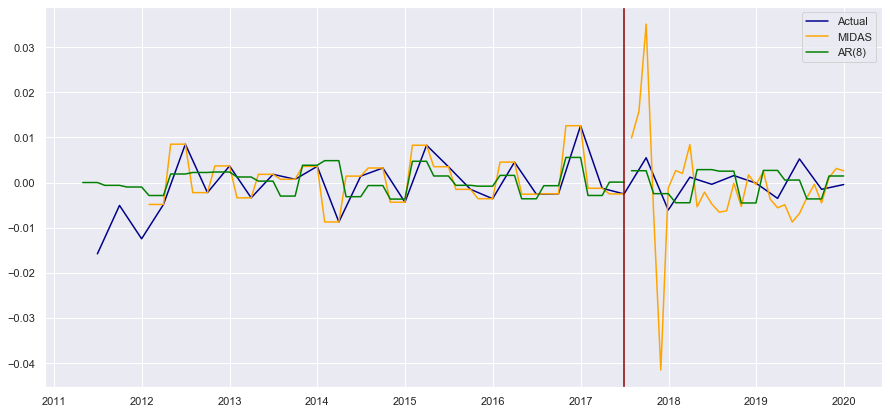

In [120]:
toplot = []

for t in np.arange(p,len(Y_train)):
    for situation in range(3):
        toplot.append(Zs[2-situation][t] @ omegas[2-situation])

toreallyplot = pd.Series([toplot[i][0] for i in range(len(toplot))])
toreallyplot.index = X_train.index[3*p:]

toplot2 = []

for t in range(len(yty_var_tot)-len(Y_train)):
    for situation in range(3):
        toplot2.append(Zstest[2-situation].iloc[:,t] @ omegas[2-situation])

toreallyplot2 = pd.Series([toplot2[i][0] for i in range(len(toplot2))])
toreallyplot2.index = X_test.index


AR8 = sm.tsa.SARIMAX(Y_train, order=(8,0,0)).fit()
artrainprediction = AR8.get_prediction().predicted_mean
artestprediction = AR8.get_forecast(steps=len(Y_test)).predicted_mean

liste1 = []
liste2 = []
for elt in artrainprediction:
    for i in range(3):
        liste1.append(elt)

for elt in artestprediction:
    for i in range(3):
        liste2.append(elt)

artrainprediction = pd.Series(liste1)
artestprediction = pd.Series(liste2)
artrainprediction.index = X_train.index
artestprediction.index = X_test.index


figure, axe = plt.subplots(figsize=(15,7))
axe.plot(yty_var_tot, color='darkblue', label='Actual')
axe.plot(toreallyplot, color='orange', label='MIDAS')
axe.plot(toreallyplot2, color='orange')
axe.plot(artrainprediction, color='green' , label='AR(8)')
axe.plot(artestprediction, color='green')
axe.axvline(Y_train.index[-1], color = 'darkred')
plt.legend()
plt.show()


### SARIMA avec variables exogènes
Le but est d'augmenter la précision de l'estimation en introduisant des variables explicatives dans le modèle ARMA classique. Par MCO, on régresse $Y_t$ sur ses réalisations passées et les valeurs $X_t$ contemporaines (nous n'introduisons ici pas de composante MA).

In [121]:
''' SARIMA Exogène '''
# SARIMAX permet de faire un tel modèle
X_selectb_agg = pd.DataFrame([X_selectb.iloc[3*i:3*(i+1),:].mean() for i in range(len(yty_var_tot))], index=yty_var_tot.index)

sarima = sm.tsa.SARIMAX(Y_train,X_selectb_agg.iloc[:len(Y_train),:],order=(8,0,0)).fit()


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Pour étendre cette représentation au cas "time averaging" plus général tel que décrit dans le papier d'Armesto, nous allons régresser cette fois sur la moyenne des $X_t$ mais pour plusieurs trimestres précédents.

In [122]:
time_averaging = pd.DataFrame()
nombre_lags = 2
compteur=0

for i,col in enumerate(X_selectb_agg.columns):
    time_averaging[compteur] = X_selectb_agg.iloc[:,i]
    compteur += 1
    if nombre_lags != 0:
        for l in range(nombre_lags):
            time_averaging[compteur] = X_selectb_agg.iloc[:,i].shift(l+1)
            compteur += 1

time_averaging = time_averaging.iloc[nombre_lags:,:]
sarima2 = sm.tsa.SARIMAX(Y_train.iloc[nombre_lags:],time_averaging.iloc[:len(Y_train)-nombre_lags,:],order=(8,0,0)).fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [123]:
yty_var_tot3 = yty_var_tot3.T
yty_var_tot3.index = X_selectb.index
yty_var_tot3 = pd.Series(yty_var_tot3[0])

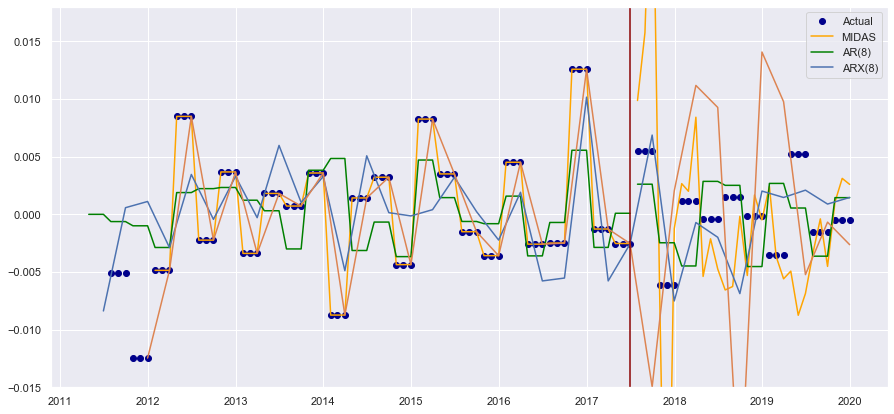

In [124]:
figure, axe = plt.subplots(figsize=(15,7))

axe.plot(yty_var_tot3, marker = 'o', linestyle='', color='darkblue', label='Actual')
axe.plot(toreallyplot, color='orange', label='MIDAS')
axe.plot(toreallyplot2, color='orange')
axe.plot(artrainprediction, color='green' , label='AR(8)')
axe.plot(artestprediction, color='green')
axe.plot(sarima.get_prediction(start=0,end=34,
endog=yty_var_tot,
exog=X_selectb_agg.iloc[len(Y_train):,:]).predicted_mean, label='ARX(8)')
axe.plot(sarima2.get_prediction(start=0,end=32,endog=yty_var_tot,exog=time_averaging.iloc[len(Y_train)-nombre_lags:,:]).predicted_mean)
axe.axvline(Y_train.index[-1], color = 'darkred')
axe.set_ylim([-0.015,0.018])

plt.legend()
plt.show()
figure.savefig('modelsforecasts.png')

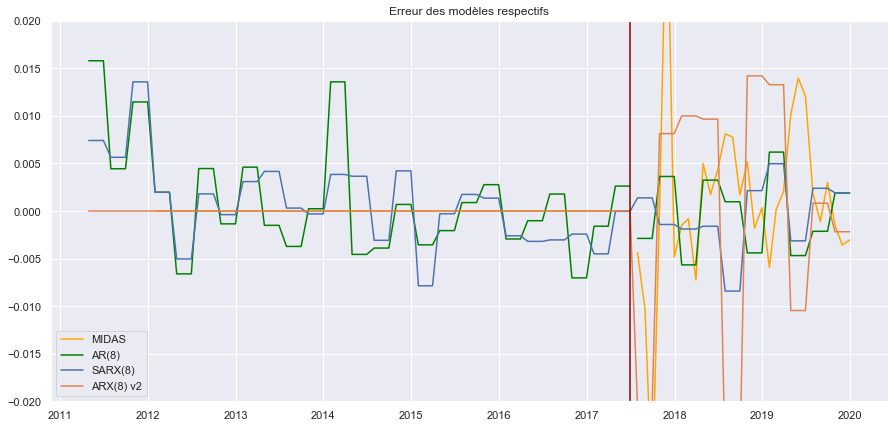

In [125]:
figure, axe = plt.subplots(figsize=(15,7))

axe.plot(yty_var_tot3.iloc[len(yty_var_tot3) - len(toreallyplot2) - len(toreallyplot):len(yty_var_tot3) - len(toreallyplot2)] - toreallyplot, color='orange', label='MIDAS')
axe.plot((yty_var_tot3 - toreallyplot2).dropna(), color='orange')
axe.plot(artrainprediction-yty_var_tot3, color='green' , label='AR(8)')
axe.plot(artestprediction-yty_var_tot3, color='green')
axe.plot((sarima.get_prediction(start=0,end=34, endog=yty_var_tot,exog=X_selectb_agg.iloc[len(Y_train):,:]).predicted_mean-yty_var_tot3).bfill(), label='SARX(8)')

axe.plot((sarima2.get_prediction(start=0,end=32,endog=yty_var_tot,exog=time_averaging.iloc[len(Y_train)-nombre_lags:,:]).predicted_mean-yty_var_tot3).bfill(), label='ARX(8) v2')

axe.axvline(Y_train.index[-1], color = 'darkred')
axe.set_ylim([-0.02,0.02])
axe.set_title("Erreur des modèles respectifs")
plt.legend()
plt.show()
figure.savefig('modelserrors.png')

In [126]:
(((sarima2.get_prediction(start=0,end=32,endog=yty_var_tot,exog=time_averaging.iloc[len(Y_train)-nombre_lags:,:]).predicted_mean - yty_var_tot.iloc[nombre_lags:,0]).iloc[len(Y_train)-nombre_lags:])**2).sum()

0.001871898517815355

In [127]:

train_mse_midas = ((yty_var_tot3.iloc[len(yty_var_tot3) - len(toreallyplot2) - len(toreallyplot):len(yty_var_tot3) - len(toreallyplot2)] - toreallyplot)**2).mean()
test_mse_midas = (((yty_var_tot3 - toreallyplot2).dropna())**2).mean()
train_mse_ar = (((artrainprediction-yty_var_tot3).dropna())**2).mean()
test_mse_ar = (((artestprediction-yty_var_tot3).dropna())**2).mean()
train_mse_sarx = ((sarima.get_prediction(start=0,end=34, endog=yty_var_tot,exog=X_selectb_agg.iloc[len(Y_train):,:]).predicted_mean-yty_var_tot3).bfill().iloc[:len(X_train)]**2).mean()
test_mse_sarx = ((sarima.get_prediction(start=0,end=34, endog=yty_var_tot,exog=X_selectb_agg.iloc[len(Y_train):,:]).predicted_mean-yty_var_tot3).bfill().iloc[len(X_train):]**2).mean()
train_mse_sarx2 = (((sarima2.get_prediction(start=0,end=32,endog=yty_var_tot,exog=time_averaging.iloc[len(Y_train)-nombre_lags:,:]).predicted_mean - yty_var_tot.iloc[nombre_lags:,0]).iloc[:len(Y_train)-nombre_lags])**2).sum()
test_mse_sarx2 = (((sarima2.get_prediction(start=0,end=32,endog=yty_var_tot,exog=time_averaging.iloc[len(Y_train)-nombre_lags:,:]).predicted_mean - yty_var_tot.iloc[nombre_lags:,0]).iloc[len(Y_train)-nombre_lags:])**2).sum()



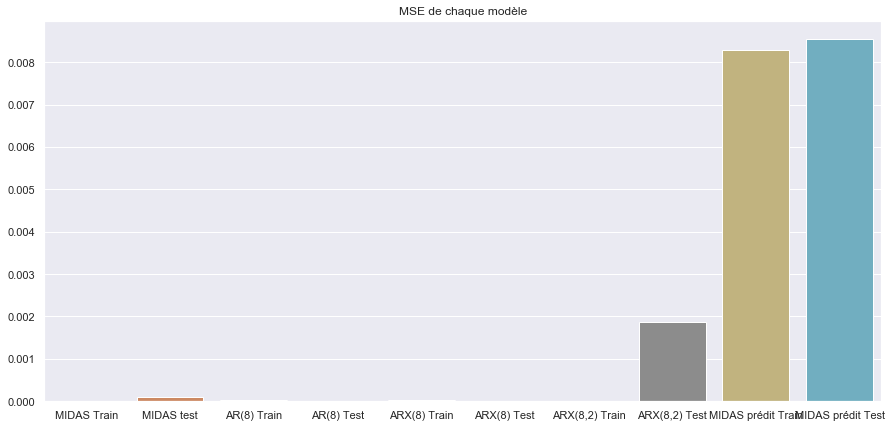

In [128]:
figure, axe = plt.subplots(figsize=(15,7))

sns.barplot(x=['MIDAS Train','MIDAS test','AR(8) Train','AR(8) Test', 'ARX(8) Train', 'ARX(8) Test','ARX(8,2) Train', 'ARX(8,2) Test','MIDAS prédit Train', 'MIDAS prédit Test'],y=[train_mse_midas,test_mse_midas,train_mse_ar,test_mse_ar,train_mse_sarx,test_mse_sarx,train_mse_sarx2,test_mse_sarx2,train_mse_midaspred,test_mse_midaspred],ax=axe)
axe.set_title('MSE de chaque modèle')
plt.show()
figure.savefig('modelsmse.png')

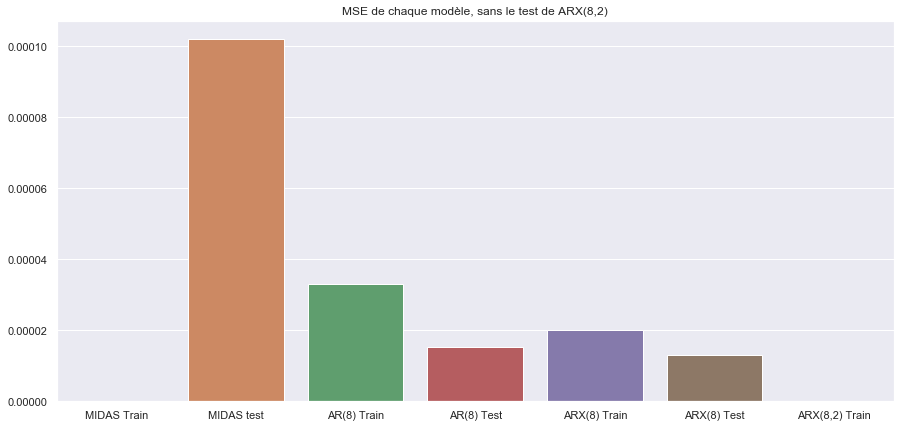

In [129]:
figure, axe = plt.subplots(figsize=(15,7))

sns.barplot(x=['MIDAS Train','MIDAS test','AR(8) Train','AR(8) Test', 'ARX(8) Train', 'ARX(8) Test','ARX(8,2) Train'],y=[train_mse_midas,test_mse_midas,train_mse_ar,test_mse_ar,train_mse_sarx,test_mse_sarx,train_mse_sarx2],ax=axe)
axe.set_title('MSE de chaque modèle, sans le test de ARX(8,2)')
plt.show()
figure.savefig('modelsmse2.png')

Idée de solution : bagging du MIDAS (? l'échantillon n'est pas iid), poser des contraintes au MIDAS (contraintes polynomiales), lissage exponentiel

### Visualisation des résultats intégrés

In [130]:
yty_var_tot = pd.DataFrame({'Variations de la consommation':var, 'Date':list(conso.index)[4:]})
yty_var_tot = yty_var_tot.set_index('Date').loc['2011T1':].iloc[:,0].shift(1).iloc[1:]

yty_var_tot.index = lesdates[np.arange(2,len(lesdates),3)]
yty_var_tot3 = pd.DataFrame()
for i in range(len(X_selectb)):
    yty_var_tot3[i] = pd.Series(np.float64(yty_var_tot.iloc[i//3]))
yty_var_tot3 = yty_var_tot3.T[0]
yty_var_tot3.index = X_selectb.index
yty_var_tot3

2011-04-30    0.041476
2011-05-31    0.041476
2011-06-30    0.041476
2011-07-31    0.025680
2011-08-31    0.025680
                ...   
2019-08-31    0.025692
2019-09-30    0.025692
2019-10-31    0.024191
2019-11-30    0.024191
2019-12-31    0.024191
Name: 0, Length: 105, dtype: float64

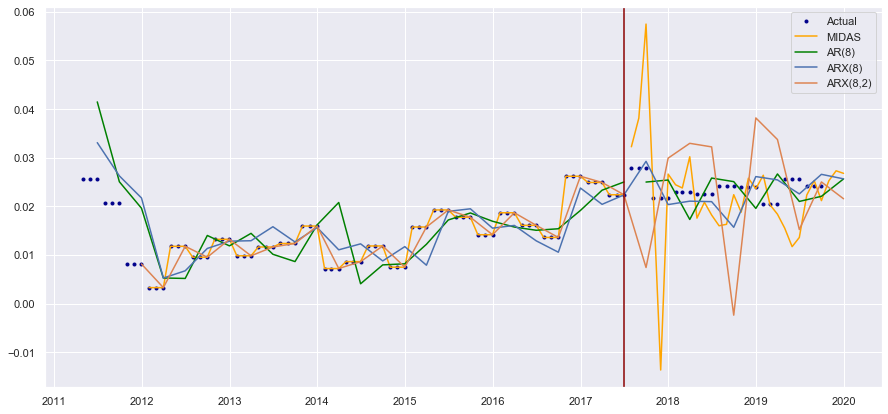

In [131]:
figure, axe = plt.subplots(figsize=(15,7))

axe.plot(yty_var_tot3.shift(-3), marker = '.', linestyle='', color='darkblue', label='Actual')

axe.plot((toreallyplot+yty_var_tot3).dropna(), color='orange', label='MIDAS')
axe.plot((toreallyplot2+yty_var_tot3).dropna(), color='orange')


axe.plot((artrainprediction+yty_var_tot).dropna(), color='green' , label='AR(8)')
axe.plot((artestprediction+yty_var_tot).dropna(), color='green')

axe.plot(sarima.get_prediction(start=0,end=34,
endog=yty_var_tot,
exog=X_selectb_agg.iloc[len(Y_train):,:]).predicted_mean+yty_var_tot, label='ARX(8)')

axe.plot(sarima2.get_prediction(start=0,end=32,
endog=yty_var_tot,
exog=time_averaging.iloc[len(Y_train)-nombre_lags:,:]).predicted_mean+yty_var_tot, label='ARX(8,2)')

axe.axvline(Y_train.index[-1], color = 'darkred')

plt.legend()
plt.show()

### Résultats avec inputs CVS

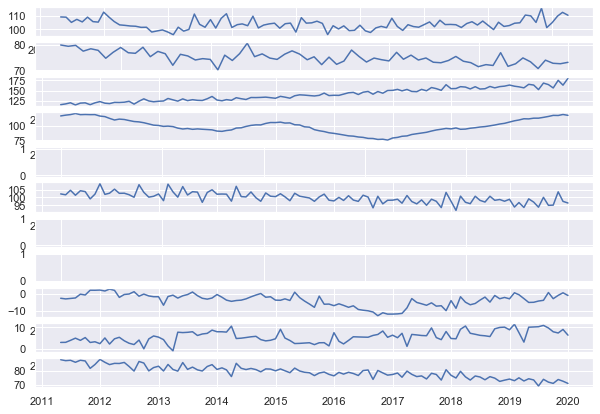

In [132]:
X_selecta = X[selectionCVS].iloc[-105:,:] # On calcule en yty_var
X_selecta.index = lesdates
figg, axx = plt.subplots(len(X_selecta.columns), figsize=(10,7))
for i in range(len(X_selecta.columns)):
    axx[i].plot(X_selecta.iloc[:,i])
plt.show()

Nous allons dropper les colonnes NaN.

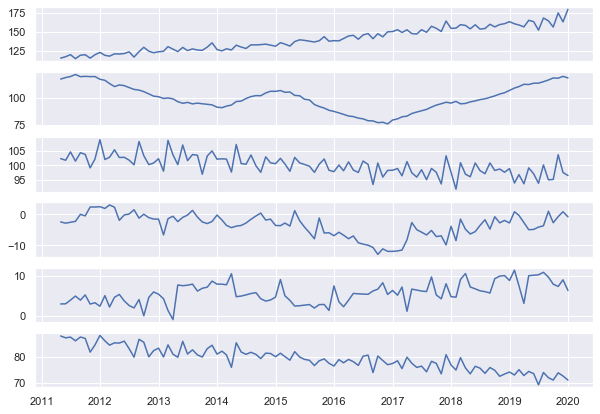

In [133]:
X_selecta = X_selecta.drop(['Information et communication, situation de la trésorerie en fin de mois (CVS)','Transports, hébergement et restauration, prévisions d\'évolution de la demande globale à 1 mois (CVS)','Transports routiers de fret et par conduites, évolution de l\'activité par rapport au mois précédent (CVS)'], axis=1)
X_selecta = X_selecta.iloc[:,2:]
figg, axx = plt.subplots(len(X_selecta.columns), figsize=(10,7), sharex = True)
for i in range(len(X_selecta.columns)):
    axx[i].plot(X_selecta.iloc[:,i])
plt.show()

In [134]:
regX = pd.DataFrame()
regX['Constante'] = pd.Series(np.ones(len(X_selectb)))
regX['Temps'] = pd.Series(np.arange(1,len(X_selectb)+1))
regX.index = X_selectb.index
ts = []
for i in range(len(X_selectb.columns)):
    ts.append((sm.OLS(X_selectb.iloc[:,i],regX).fit().pvalues < 0.05)) # On regarde pour chaque variable s'il y a une tendance déterministe


adftest = [] # On fait un test ADF pour chacune

for i in range(len(X_selectb.columns)):
    regressionmode = ''
    if ts[i][0] :
        regressionmode += 'c'
        if ts[i][1] :
            regressionmode += 't'
    else:
        regressionmode = 'nc'
    adftest.append(adfuller(X_selectb.iloc[:,i],regression = regressionmode, maxlag=24, autolag='t-stat')[1] < 0.05)

adftest

[True, True, True, True, True, True, True, True, True, True]

Les séries CVS sont déjà stationnaires !

In [135]:
''' Calcul de omega '''

p = 4 # On fixe l'ordre de régression p, il faudrait enquêter sur les autocorrélations
k = len(X_selecta.columns)

Z = pd.DataFrame() # Pour tout t, on construit Z_3t dans une liste
for t in np.arange(p,len(yty_var_tot)):
    z = [1]
    for i in np.arange(1,p): # On rajoute les Y_3(t-i)
        z.append(np.float64(yty_var_tot.iloc[t-i]))
    for j in range(k): # On rajoute les X_3t-i
        for l in np.arange(0,3*p):
            z.append(np.float64(X_selecta.iloc[(3*t)-l,j])) # Vérifier qu'on a les bons index
    Z[t] = pd.Series(z)

sumdesign = Z @ Z.T
inv_sumdesign = pd.DataFrame(np.linalg.pinv(sumdesign.values)) # Ensuite, on calcule la somme des matrices de design et son inverse
secondfactor = pd.DataFrame(Z.values @ yty_var_tot.iloc[p:].values) # On calcule également la somme des produits Z_3t' par Y_3t

omega = inv_sumdesign @ secondfactor 

In [136]:
''' Calcul des résidus sur l'échantillon d'entraînement '''

fcst = pd.DataFrame()
for t in np.arange(p,len(yty_var_tot)):
    fcst[t] = omega.T @ Z[t]

fcst = fcst.T
fcst.index = yty_var_tot.index[p:]

epsilon = yty_var_tot['Variations de la consommation'] - fcst[0]

KeyError: 'Variations de la consommation'

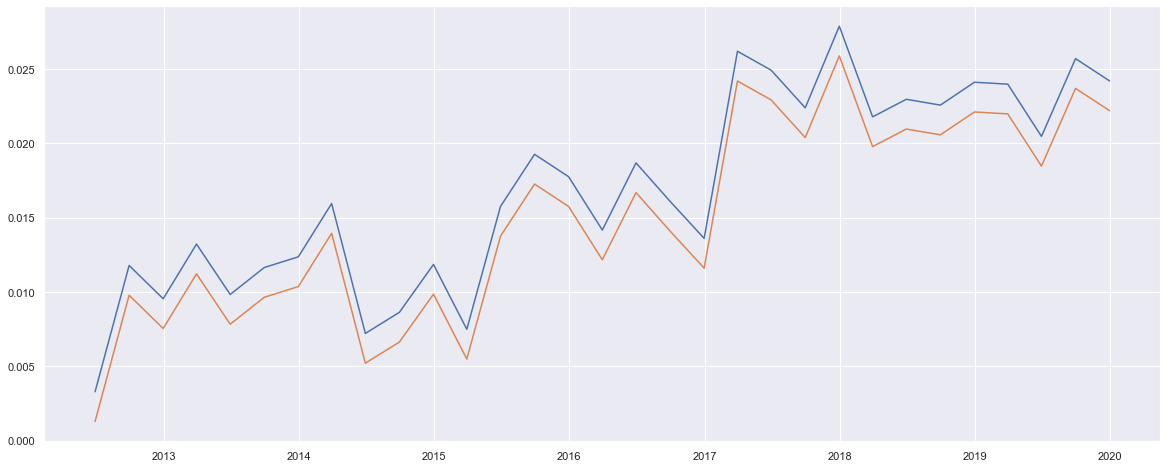

In [137]:
figure, axe = plt.subplots(figsize=(20,8))
axe.plot(fcst.index, fcst)
axe.plot(fcst.index, yty_var_tot[p:]-0.002) # On décale un tout petit peu pour voir qqch
plt.show()

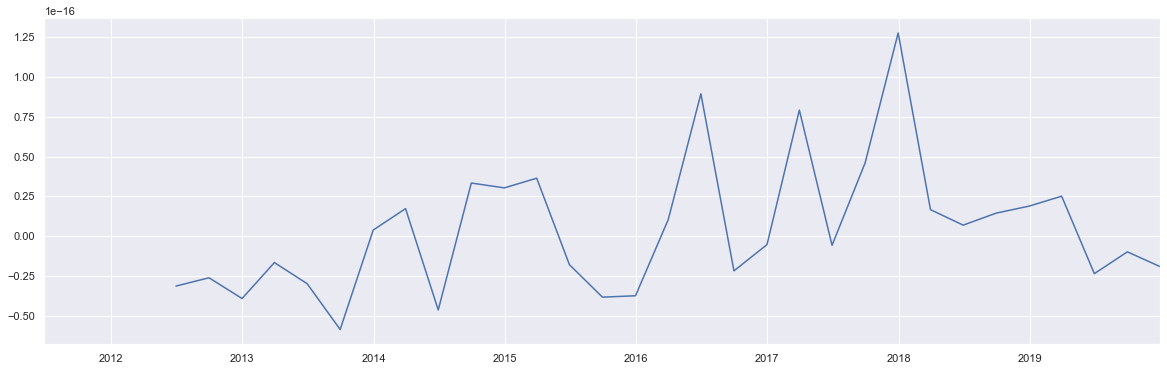

In [138]:
epsilon.plot(figsize=(20,6))
plt.show()

In [139]:
Y_train = yty_var_tot.iloc[:25]
Y_test = yty_var_tot.iloc[25:]
X_train = X_selecta.iloc[:75,:]
X_test = X_selecta.iloc[75:,:]

In [140]:
''' Calcul des omegas de l'approche directe '''

p = 4 # On fixe l'ordre de régression p, il faudrait enquêter sur les autocorrélations
k = len(X_selecta.columns)

Zs = []
omegas = []
for situation in range(4):

    Z = pd.DataFrame() # Pour tout t, on construit Z_3t dans une liste
    for t in np.arange(p,len(yty_var_tot)):
        z = [1]
        for i in np.arange(1,p): # On rajoute les Y_3(t-i)
            z.append(np.float64(yty_var_tot.iloc[t-i]))
        for j in range(k): # On rajoute les X_3t-i
            for l in np.arange(0,3*p):
                z.append(np.float64(X_selecta.iloc[(3*t)-situation-l,j])) # Vérifier qu'on a les bons index
        Z[t] = pd.Series(z)
    Zs.append(Z)
    sumdesign = Z @ Z.T
    inv_sumdesign = pd.DataFrame(np.linalg.pinv(sumdesign.values)) # Ensuite, on calcule la somme des matrices de design et son inverse
    secondfactor = pd.DataFrame(Z.values @ yty_var_tot.iloc[p:].values) # On calcule également la somme des produits Z_3t' par Y_3t

    omega = inv_sumdesign @ secondfactor
    omegas.append(omega)

Zstest = []
for situation in range(4):

    Z = pd.DataFrame() # Pour tout t, on construit Z_3t dans une liste
    for t in np.arange(len(Y_train),len(yty_var_tot)):
        z = [1]
        for i in np.arange(1,p): # On rajoute les Y_3(t-i)
            z.append(np.float64(yty_var_tot.iloc[t-i]))
        for j in range(k): # On rajoute les X_3t-i
            for l in np.arange(0,3*p):
                z.append(np.float64(X_selecta.iloc[(3*t)-situation-l,j])) # Vérifier qu'on a les bons index
        Z[t] = pd.Series(z)
    Zstest.append(Z)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


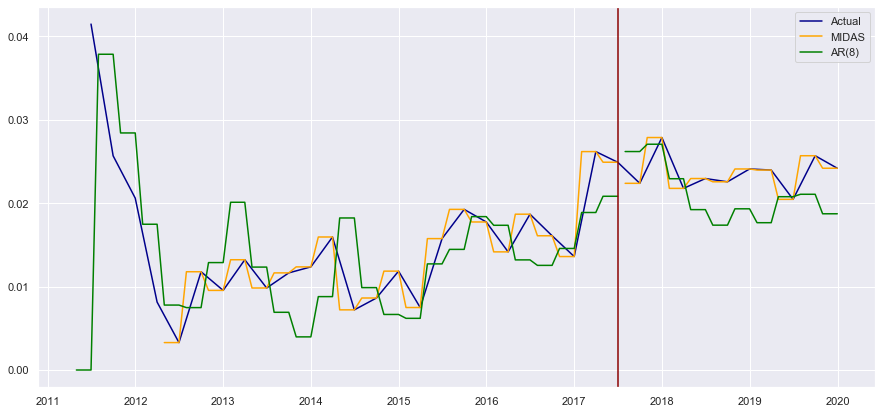

In [141]:
toplot = []

for t in np.arange(p,len(Y_train)):
    for situation in range(3):
        toplot.append(Zs[2-situation][t] @ omegas[2-situation])

toreallyplot = pd.Series([toplot[i][0] for i in range(len(toplot))])
toreallyplot.index = X_train.index[3*p:]

toplot2 = []

for t in range(len(yty_var_tot)-len(Y_train)):
    for situation in range(3):
        toplot2.append(Zstest[2-situation].iloc[:,t] @ omegas[2-situation])

toreallyplot2 = pd.Series([toplot2[i][0] for i in range(len(toplot2))])
toreallyplot2.index = X_test.index


AR8 = sm.tsa.SARIMAX(Y_train, order=(8,0,0)).fit()
artrainprediction = AR8.get_prediction().predicted_mean
artestprediction = AR8.get_forecast(steps=len(Y_test)).predicted_mean

liste1 = []
liste2 = []
for elt in artrainprediction:
    for i in range(3):
        liste1.append(elt)

for elt in artestprediction:
    for i in range(3):
        liste2.append(elt)

artrainprediction = pd.Series(liste1)
artestprediction = pd.Series(liste2)
artrainprediction.index = X_train.index
artestprediction.index = X_test.index


figure, axe = plt.subplots(figsize=(15,7))
axe.plot(yty_var_tot, color='darkblue', label='Actual')
axe.plot(toreallyplot, color='orange', label='MIDAS')
axe.plot(toreallyplot2, color='orange')
axe.plot(artrainprediction, color='green' , label='AR(8)')
axe.plot(artestprediction, color='green')
axe.axvline(Y_train.index[-1], color = 'darkred')
plt.legend()
plt.show()